
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

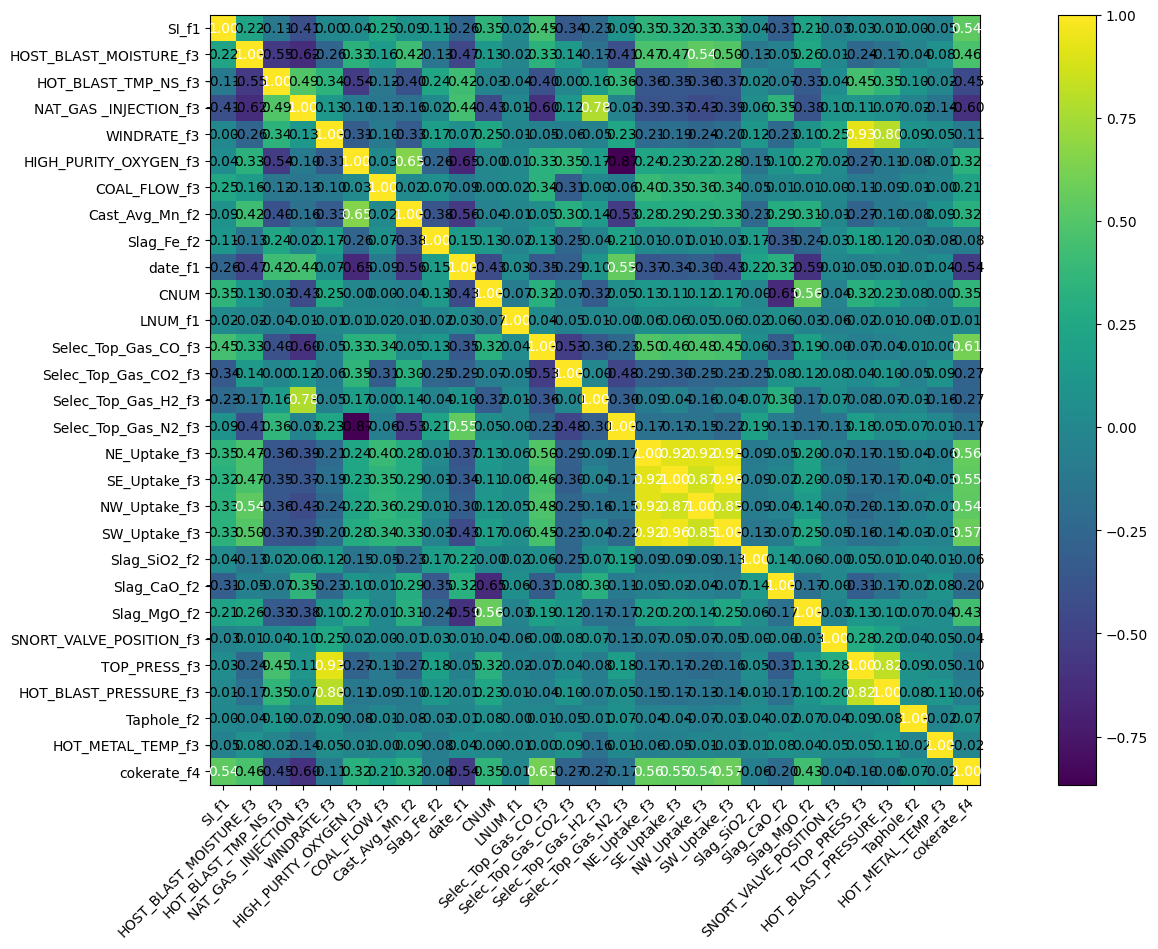

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:



tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   float64
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   float64
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   float64
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

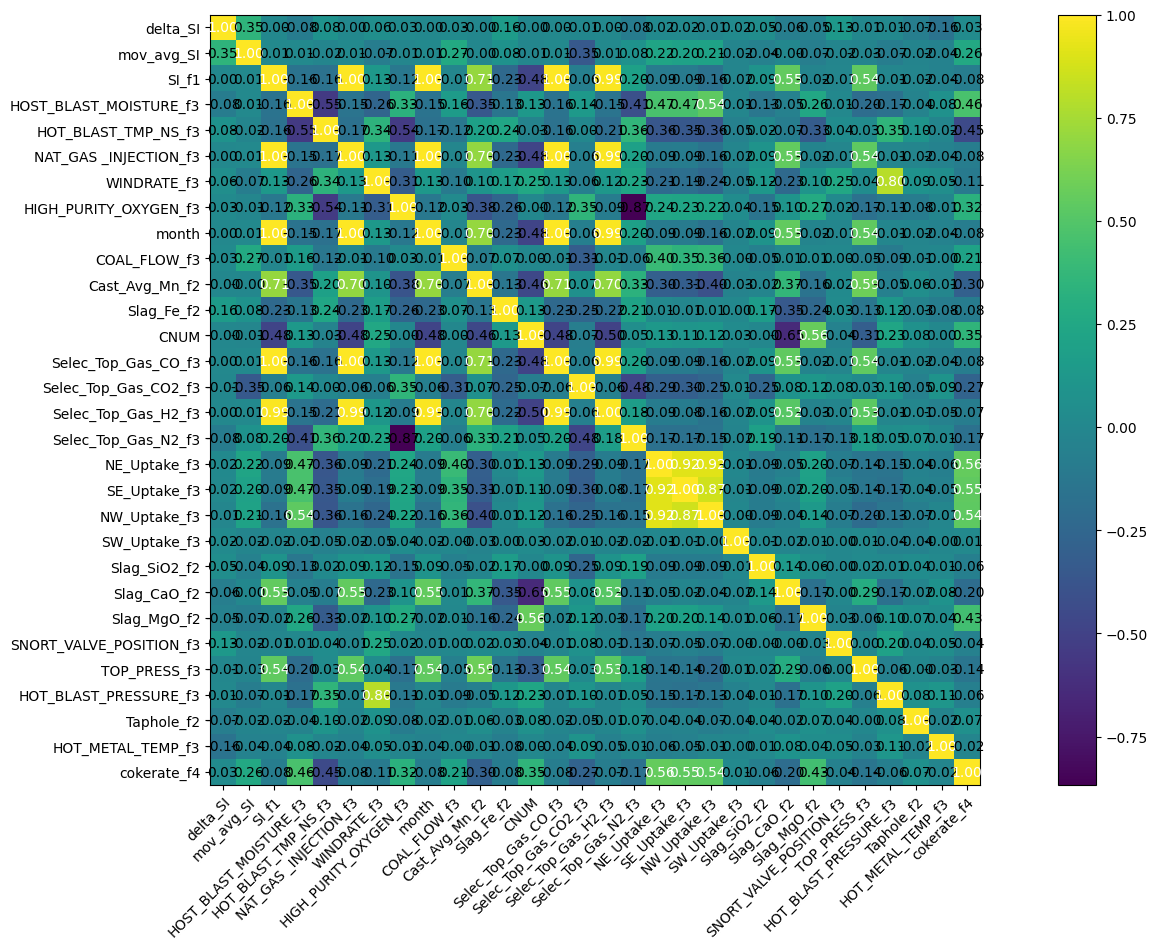

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
      
       
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 0.5
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.887463
Loss_SI: 0.7248217463493347 Loss_all: 1.0501049757003784
===
[200] Train Loss: 0.098090
Loss_SI: 0.009870308451354504 Loss_all: 0.18630985915660858
===
[400] Train Loss: 0.068782
Loss_SI: 0.009442406706511974 Loss_all: 0.12812107801437378
===
[600] Train Loss: 0.025640
Loss_SI: 0.007694886066019535 Loss_all: 0.04358561709523201
===
[800] Train Loss: 0.022034
Loss_SI: 0.0035463403910398483 Loss_all: 0.04052116721868515
===


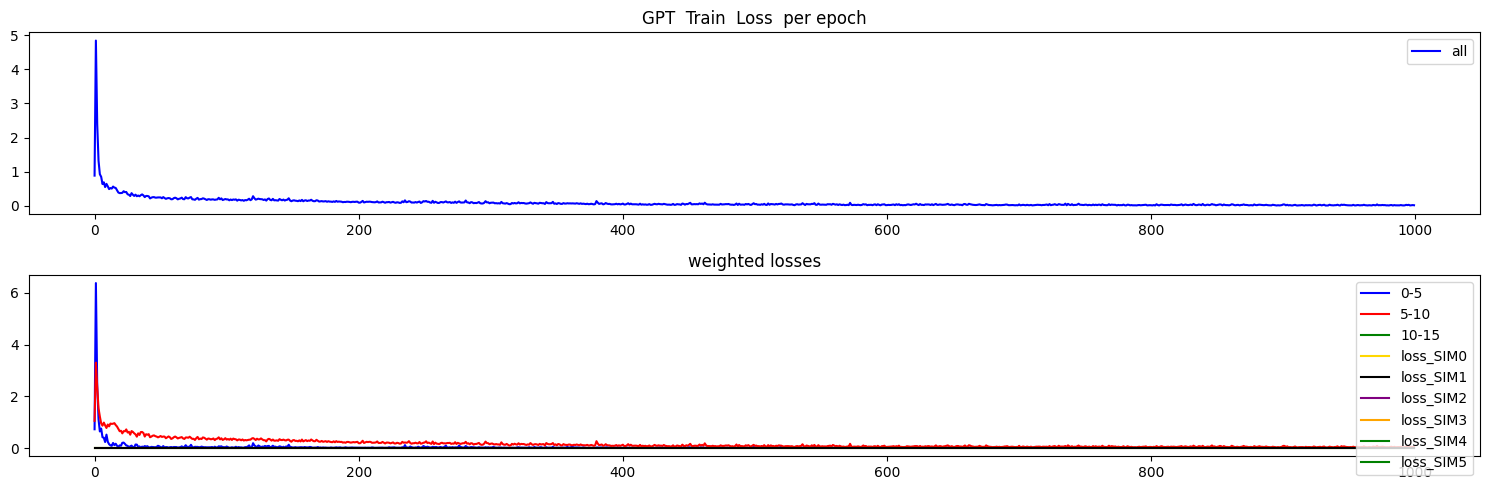

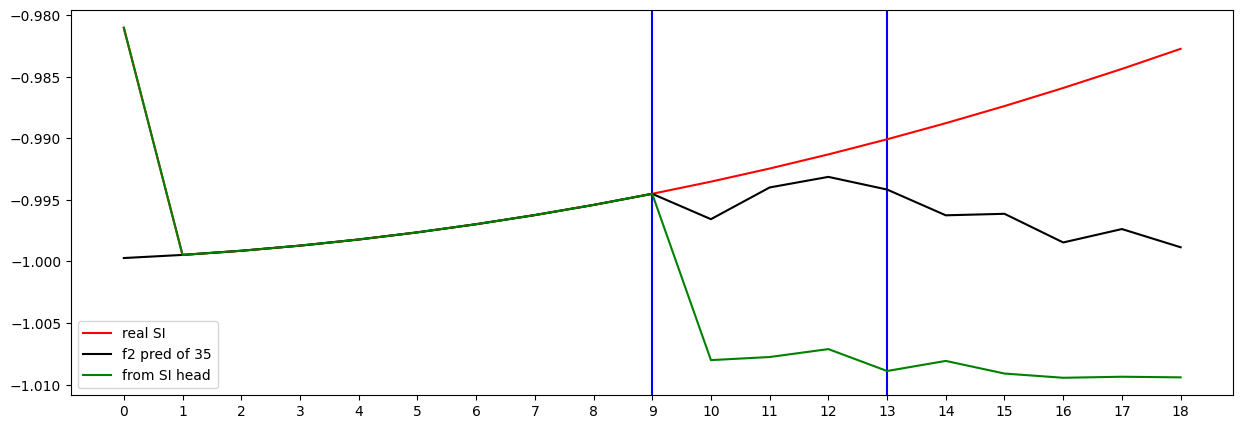

Testing R**2 - (all) - (no inputs):  0.999914304400788
Testing R**2 - (f2) - SI full (no inputs):  -6.935133270812231
Testing R**2 - SI head only (no inputs):  -34.10555942497527
0 ...index R**2 (no inputs):  -0.42779649128717545
1 ...index R**2 (no inputs):  -0.5642510857634802
2 ...index R**2 (no inputs):  -6.935133270812231
3 ...index R**2 (no inputs):  -13.942827567660105
4 ...index R**2 (no inputs):  -0.09296186248381755
5 ...index R**2 (no inputs):  -17.925282104526854
6 ...index R**2 (no inputs):  -0.34284754556282127
7 ...index R**2 (no inputs):  -0.34110279120656606
8 ...index R**2 (no inputs):  -13.677223957532226
9 ...index R**2 (no inputs):  -0.4544964660671158
10 ...index R**2 (no inputs):  -3.982401380175018
11 ...index R**2 (no inputs):  -3.881423866472004
12 ...index R**2 (no inputs):  -12.208365331972818
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.6233107608834487
16 ...index R**2 (no inputs):  -3.908174584647

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.920105
Loss_SI: 0.7480527758598328 Loss_all: 1.0921578407287598
===
[200] Train Loss: 0.120577
Loss_SI: 0.01001215260475874 Loss_all: 0.23114192485809326
===
[400] Train Loss: 0.115934
Loss_SI: 0.007517460733652115 Loss_all: 0.22435039281845093
===
[600] Train Loss: 0.092413
Loss_SI: 0.011573933064937592 Loss_all: 0.17325232923030853
===
[800] Train Loss: 0.059286
Loss_SI: 0.007169434335082769 Loss_all: 0.1114019975066185
===


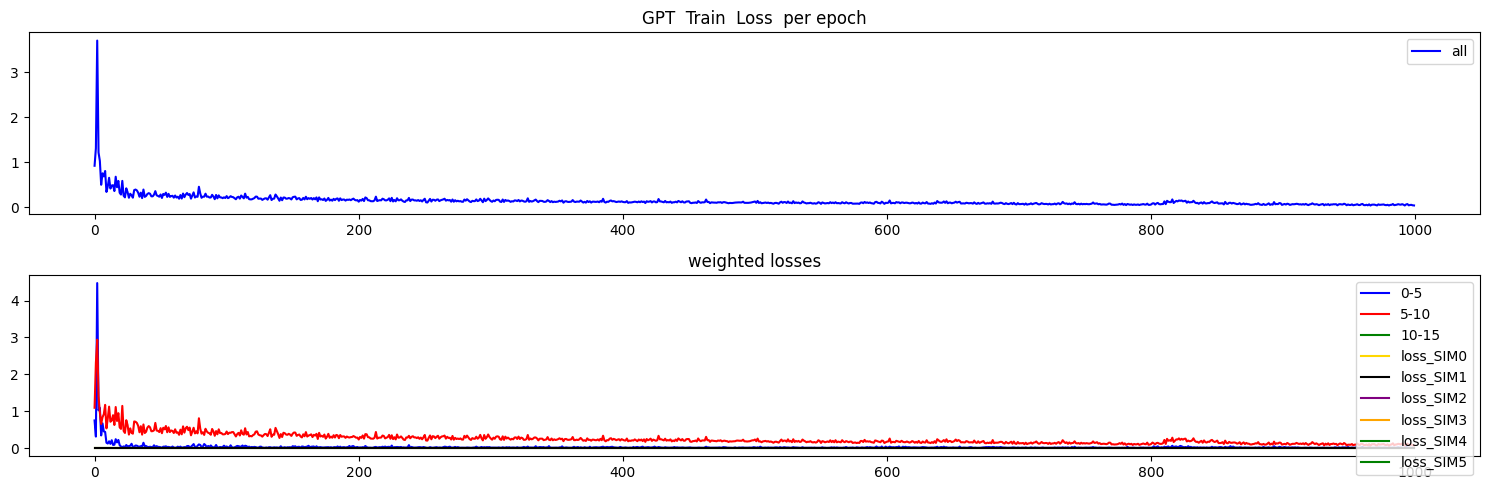

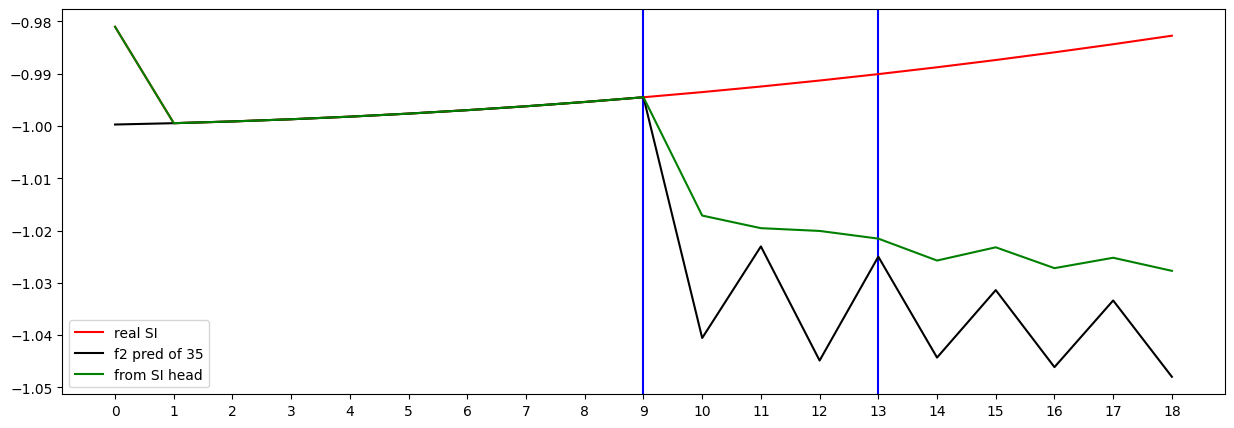

Testing R**2 - (all) - (no inputs):  0.9999042843120213
Testing R**2 - (f2) - SI full (no inputs):  -192.6027687484
Testing R**2 - SI head only (no inputs):  -97.08627253466294
0 ...index R**2 (no inputs):  -0.27389269712516495
1 ...index R**2 (no inputs):  -0.0680057425590288
2 ...index R**2 (no inputs):  -192.6027687484
3 ...index R**2 (no inputs):  -14.770504385473142
4 ...index R**2 (no inputs):  -0.8472211554249287
5 ...index R**2 (no inputs):  -121.7353201535922
6 ...index R**2 (no inputs):  -0.26158621511130287
7 ...index R**2 (no inputs):  -0.5744780966257264
8 ...index R**2 (no inputs):  -51.29879461910374
9 ...index R**2 (no inputs):  -0.23305208675804723
10 ...index R**2 (no inputs):  -5.629726515352526
11 ...index R**2 (no inputs):  -4.173916059343756
12 ...index R**2 (no inputs):  -79.05729869039727
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -15.105251116814337
16 ...index R**2 (no inputs):  -1.4708355310097625
17 .

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.077279
Loss_SI: 0.8667600750923157 Loss_all: 1.2877987623214722
===
[200] Train Loss: 0.194063
Loss_SI: 0.015563154593110085 Loss_all: 0.37256258726119995
===
[400] Train Loss: 0.161483
Loss_SI: 0.010406292043626308 Loss_all: 0.3125598132610321
===
[600] Train Loss: 0.105225
Loss_SI: 0.006014806684106588 Loss_all: 0.20443542301654816
===
[800] Train Loss: 0.109024
Loss_SI: 0.00822943914681673 Loss_all: 0.20981810986995697
===


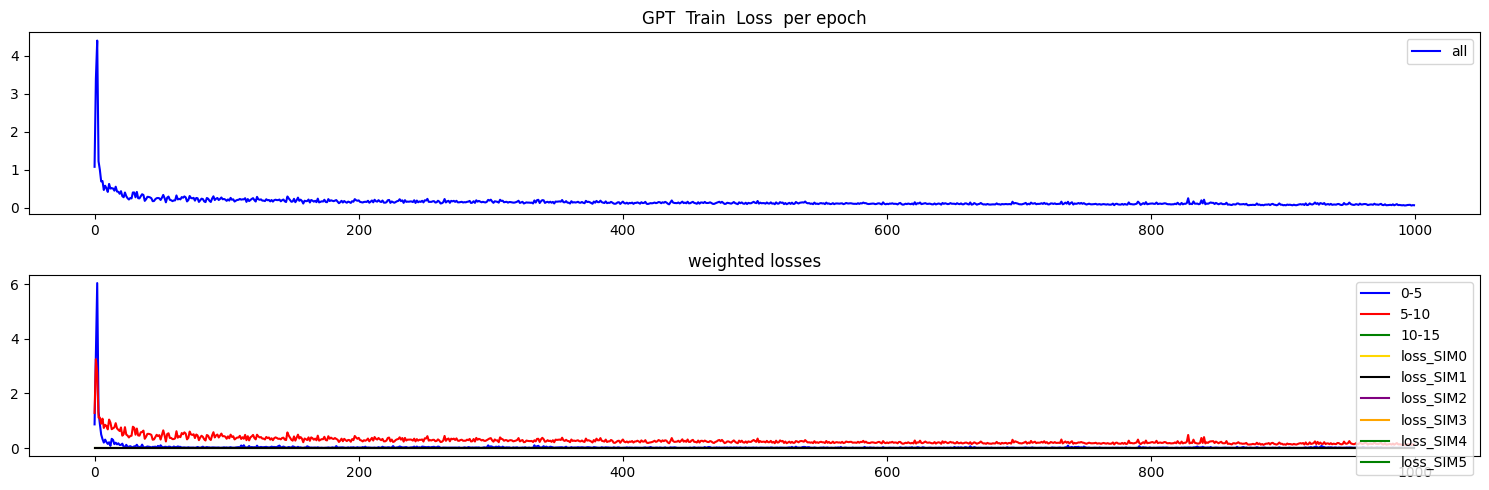

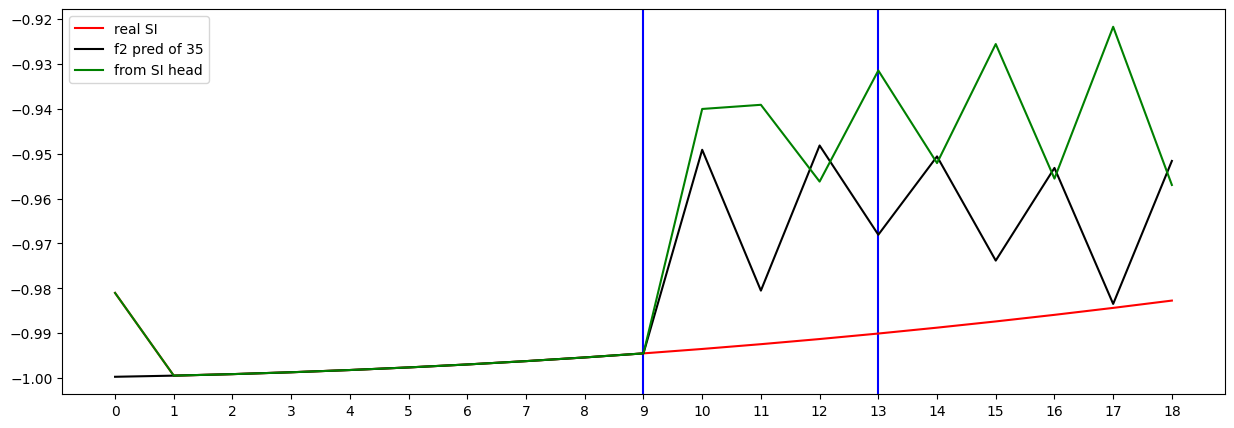

Testing R**2 - (all) - (no inputs):  0.9998466562380919
Testing R**2 - (f2) - SI full (no inputs):  -60.16347320015362
Testing R**2 - SI head only (no inputs):  -161.13812509053338
0 ...index R**2 (no inputs):  -0.8666998150537641
1 ...index R**2 (no inputs):  -3.7176258032808693
2 ...index R**2 (no inputs):  -60.16347320015362
3 ...index R**2 (no inputs):  0.124050386981573
4 ...index R**2 (no inputs):  -2.31214074677654
5 ...index R**2 (no inputs):  -134.77169506054534
6 ...index R**2 (no inputs):  -0.5593591018478357
7 ...index R**2 (no inputs):  -1.0004649948355135
8 ...index R**2 (no inputs):  -108.33397565937335
9 ...index R**2 (no inputs):  -0.627204691613827
10 ...index R**2 (no inputs):  -163.51968685440625
11 ...index R**2 (no inputs):  -43.538401790535474
12 ...index R**2 (no inputs):  -124.83155156382443
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -105.79416961217203
16 ...index R**2 (no inputs):  -11.224556200819592


In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.070541
Loss_SI: 1.0502569675445557 Loss_all: 1.0908249616622925
===
[200] Train Loss: 0.163927
Loss_SI: 0.016759563237428665 Loss_all: 0.3110947012901306
===
[400] Train Loss: 0.146878
Loss_SI: 0.007916289381682873 Loss_all: 0.28584015369415283
===
[600] Train Loss: 0.135364
Loss_SI: 0.01752641424536705 Loss_all: 0.2532016932964325
===
[800] Train Loss: 0.091718
Loss_SI: 0.004295761231333017 Loss_all: 0.1791405826807022
===


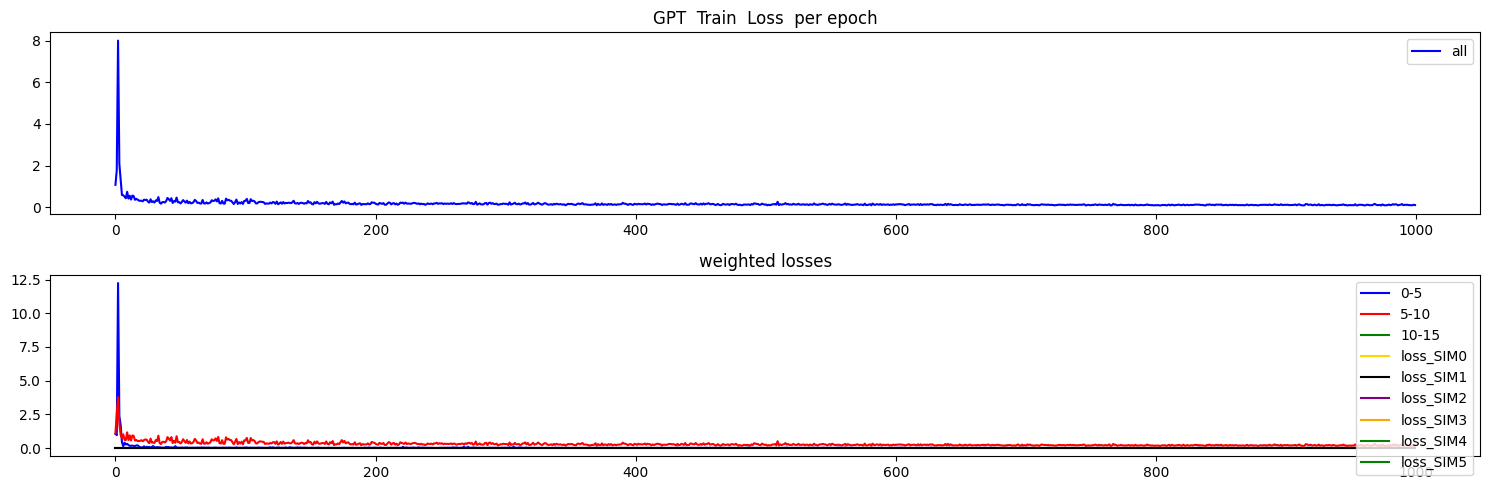

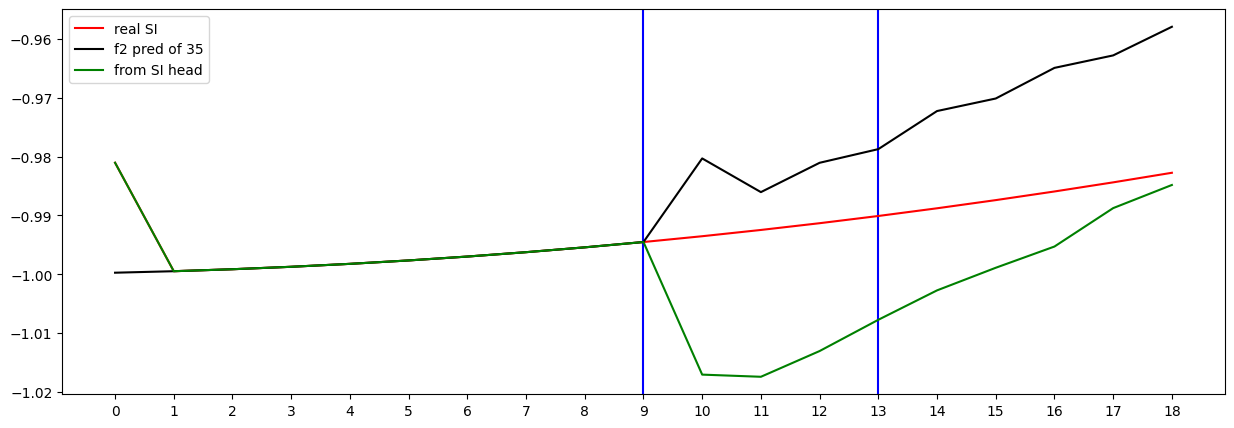

Testing R**2 - (all) - (no inputs):  0.9998574519204774
Testing R**2 - (f2) - SI full (no inputs):  -16.467821887493056
Testing R**2 - SI head only (no inputs):  -21.32325205021906
0 ...index R**2 (no inputs):  -0.15442444380490294
1 ...index R**2 (no inputs):  -0.43202564193823023
2 ...index R**2 (no inputs):  -16.467821887493056
3 ...index R**2 (no inputs):  -3.1964241232997237
4 ...index R**2 (no inputs):  -8.983527085657975
5 ...index R**2 (no inputs):  -31.280301759888687
6 ...index R**2 (no inputs):  -0.3532249737477364
7 ...index R**2 (no inputs):  0.2783277536149058
8 ...index R**2 (no inputs):  -247.5900451198237
9 ...index R**2 (no inputs):  -0.10778806023401377
10 ...index R**2 (no inputs):  -94.32666157974343
11 ...index R**2 (no inputs):  -80.72667166183399
12 ...index R**2 (no inputs):  -7.626938630156793
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -69.13983061165506
16 ...index R**2 (no inputs):  -3.572160954591581

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.101737
Loss_SI: 0.7211704254150391 Loss_all: 1.4823036193847656
===
[200] Train Loss: 0.142053
Loss_SI: 0.049920208752155304 Loss_all: 0.23418602347373962
===
[400] Train Loss: 0.047164
Loss_SI: 0.013687113299965858 Loss_all: 0.0806417167186737
===
[600] Train Loss: 0.028524
Loss_SI: 0.005795342847704887 Loss_all: 0.051253605633974075
===
[800] Train Loss: 0.024207
Loss_SI: 0.004045819863677025 Loss_all: 0.044368404895067215
===


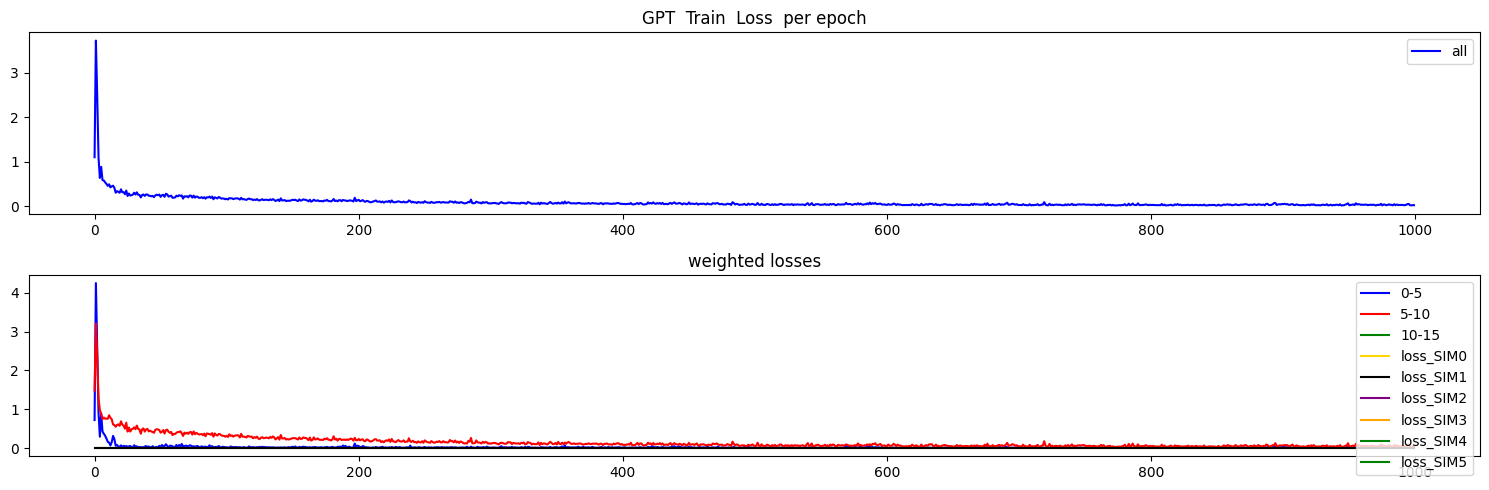

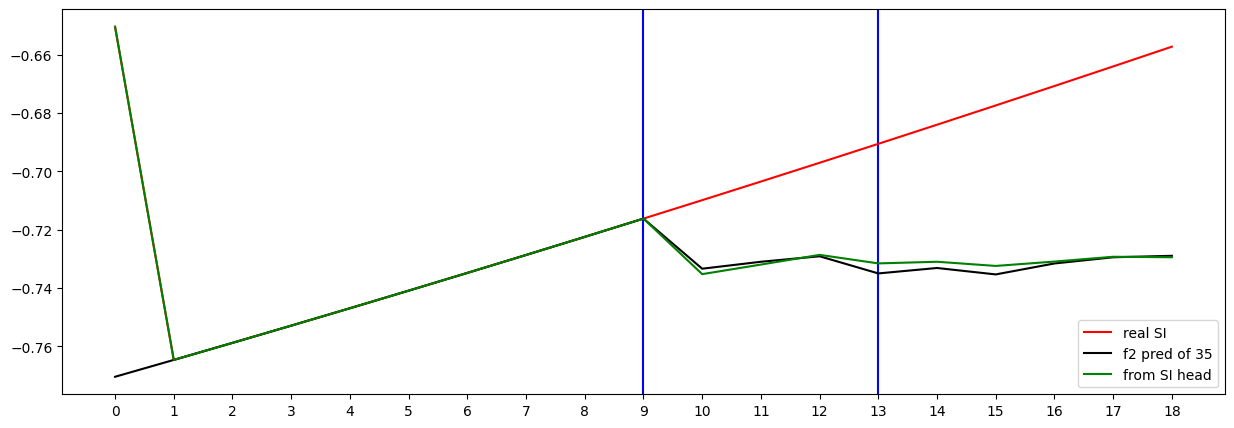

Testing R**2 - (all) - (no inputs):  0.9998155505426063
Testing R**2 - (f2) - SI full (no inputs):  -10.115532639272372
Testing R**2 - SI head only (no inputs):  -9.801390796785759
0 ...index R**2 (no inputs):  0.2169710830406224
1 ...index R**2 (no inputs):  -3.251313889686469
2 ...index R**2 (no inputs):  -10.115532639272372
3 ...index R**2 (no inputs):  -0.08167397949315758
4 ...index R**2 (no inputs):  -1.0215798538459255
5 ...index R**2 (no inputs):  -10.486268687277448
6 ...index R**2 (no inputs):  -223.9306976394665
7 ...index R**2 (no inputs):  -217.3853919660811
8 ...index R**2 (no inputs):  -10.628272377541737
9 ...index R**2 (no inputs):  -0.2812106403132324
10 ...index R**2 (no inputs):  -7.384925506798988
11 ...index R**2 (no inputs):  -8.22874218038658
12 ...index R**2 (no inputs):  -9.842147751124475
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.149646241226298
16 ...index R**2 (no inputs):  -0.8114715078211843
17

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.968689
Loss_SI: 0.6932162642478943 Loss_all: 1.2441624402999878
===
[200] Train Loss: 0.168697
Loss_SI: 0.04173683747649193 Loss_all: 0.2956577241420746
===
[400] Train Loss: 0.154052
Loss_SI: 0.05587112903594971 Loss_all: 0.25223371386528015
===
[600] Train Loss: 0.066904
Loss_SI: 0.018210595473647118 Loss_all: 0.11559790372848511
===
[800] Train Loss: 0.060878
Loss_SI: 0.013698768801987171 Loss_all: 0.10805709660053253
===


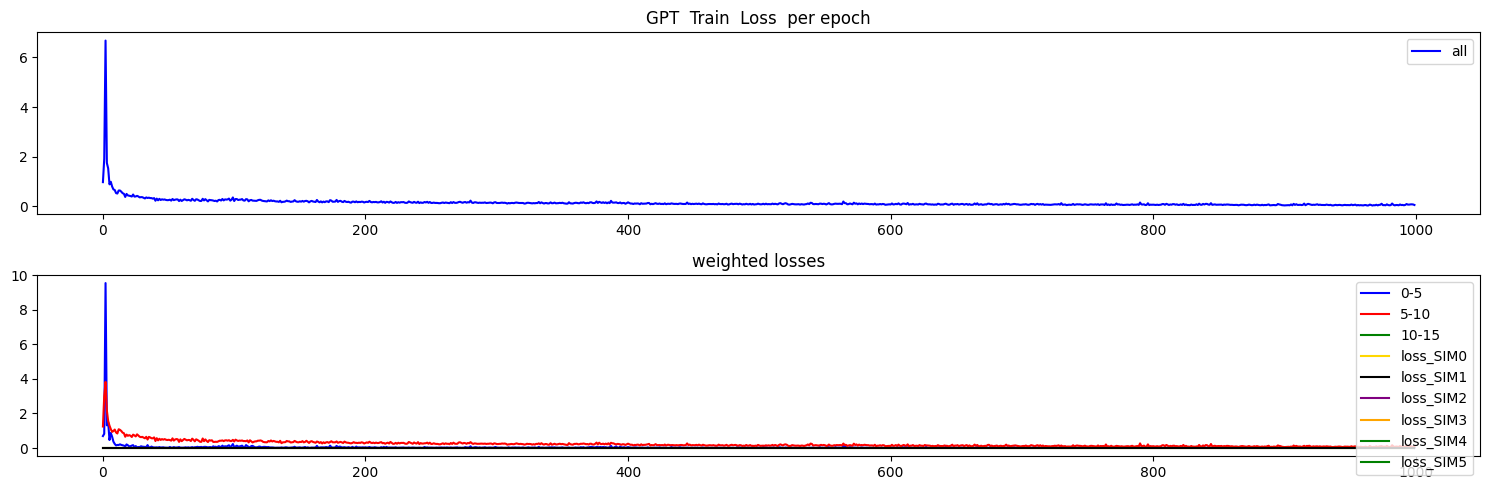

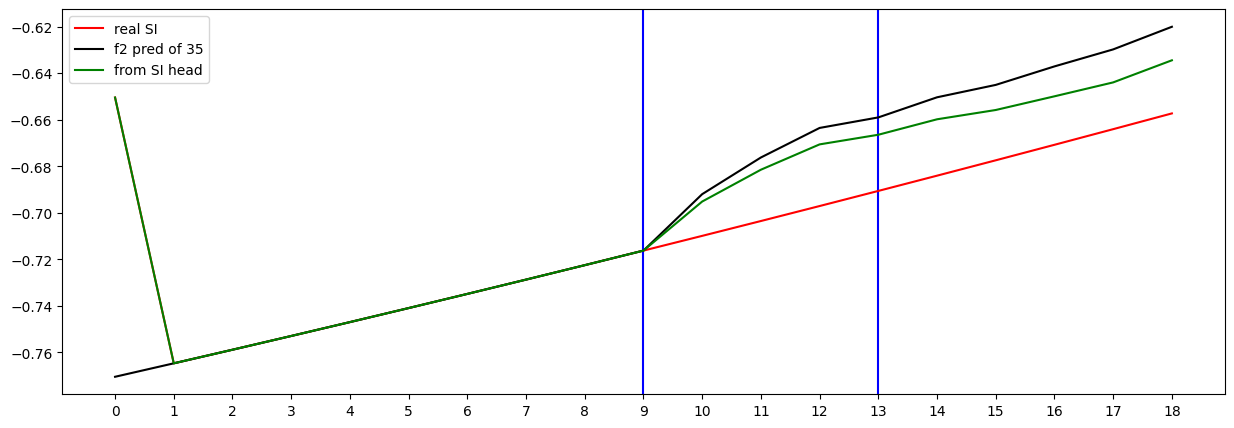

Testing R**2 - (all) - (no inputs):  0.9993868028606107
Testing R**2 - (f2) - SI full (no inputs):  -1.170849339762297
Testing R**2 - SI head only (no inputs):  0.1705383035880209
0 ...index R**2 (no inputs):  0.34212975132860346
1 ...index R**2 (no inputs):  -1.6865965639264378
2 ...index R**2 (no inputs):  -1.170849339762297
3 ...index R**2 (no inputs):  -0.0711446644360254
4 ...index R**2 (no inputs):  -4.86851921504307
5 ...index R**2 (no inputs):  -11.206604750672692
6 ...index R**2 (no inputs):  -285.4306678681779
7 ...index R**2 (no inputs):  -2418.8116858567573
8 ...index R**2 (no inputs):  -3.870954135002285
9 ...index R**2 (no inputs):  0.04338734749809503
10 ...index R**2 (no inputs):  -2022.399321741587
11 ...index R**2 (no inputs):  -17.16545116397013
12 ...index R**2 (no inputs):  -1.0013864341145764
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -501.0429527403106
16 ...index R**2 (no inputs):  0.03583771647833145
17 

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.462957
Loss_SI: 0.9686910510063171 Loss_all: 1.9572230577468872
===
[200] Train Loss: 0.157013
Loss_SI: 0.017007239162921906 Loss_all: 0.2970183491706848
===
[400] Train Loss: 0.155251
Loss_SI: 0.015973690897226334 Loss_all: 0.2945273220539093
===
[600] Train Loss: 0.132255
Loss_SI: 0.01633366011083126 Loss_all: 0.24817724525928497
===
[800] Train Loss: 0.098848
Loss_SI: 0.009610951878130436 Loss_all: 0.18808449804782867
===


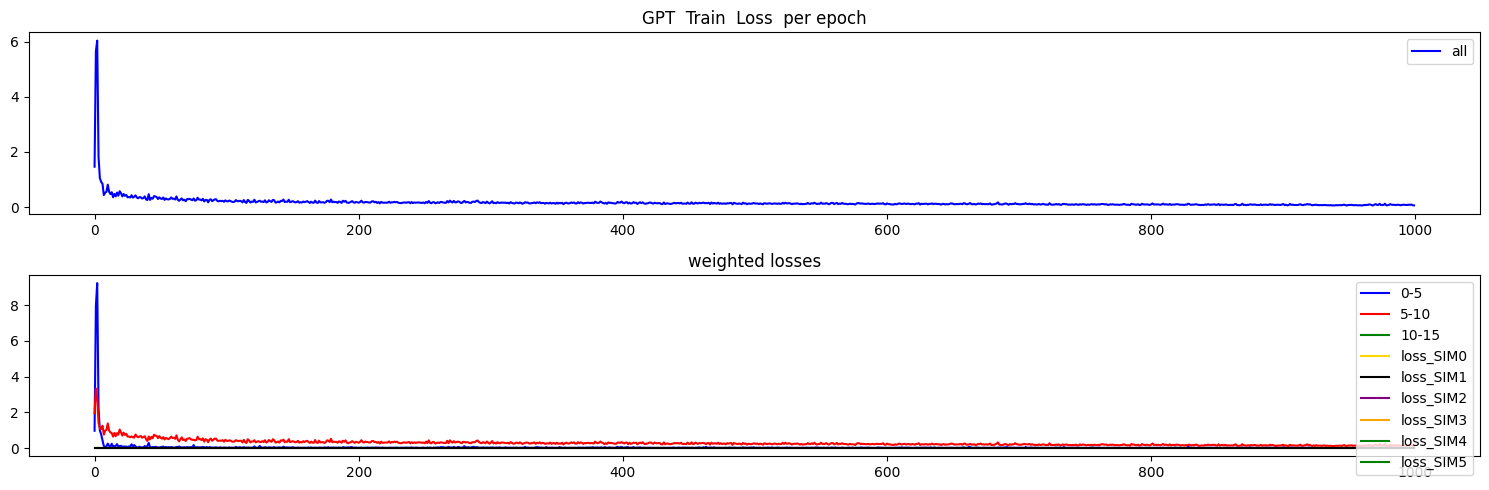

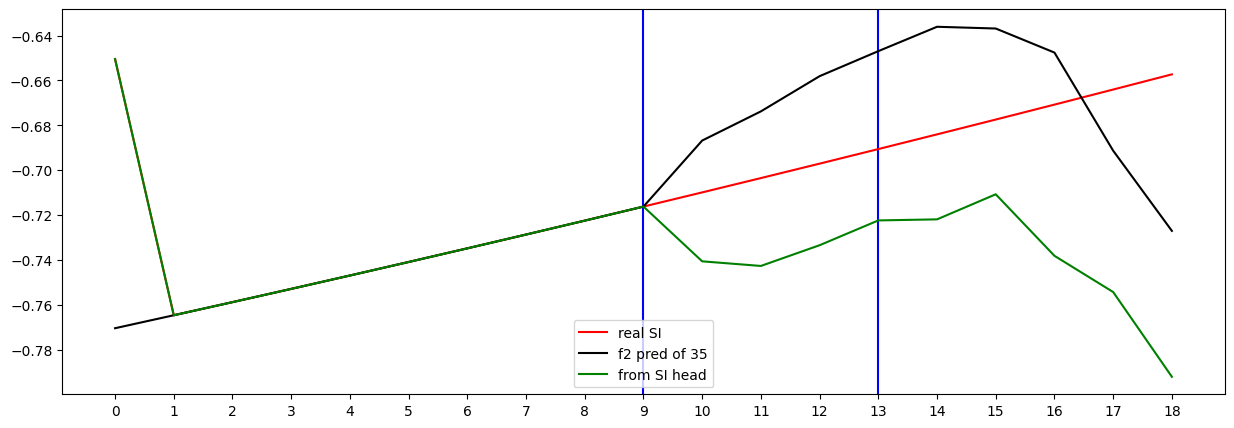

Testing R**2 - (all) - (no inputs):  0.9993320336902733
Testing R**2 - (f2) - SI full (no inputs):  -4.080278565493913
Testing R**2 - SI head only (no inputs):  -16.163977224772157
0 ...index R**2 (no inputs):  -0.09559018887656312
1 ...index R**2 (no inputs):  -6.260254911410419
2 ...index R**2 (no inputs):  -4.080278565493913
3 ...index R**2 (no inputs):  -2.7905242604599723
4 ...index R**2 (no inputs):  -451.2437092391805
5 ...index R**2 (no inputs):  -13.89046530844427
6 ...index R**2 (no inputs):  -62.645341714332325
7 ...index R**2 (no inputs):  -9163.72164461639
8 ...index R**2 (no inputs):  -6.443804698272822
9 ...index R**2 (no inputs):  -0.05430553763549595
10 ...index R**2 (no inputs):  -144.77274673975242
11 ...index R**2 (no inputs):  -26.341814226504884
12 ...index R**2 (no inputs):  -6.692444732557533
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -35.46028398645202
16 ...index R**2 (no inputs):  -1.3764800446202465
1

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.033408
Loss_SI: 0.8025951385498047 Loss_all: 1.264220952987671
===
[200] Train Loss: 0.175232
Loss_SI: 0.03086709789931774 Loss_all: 0.31959694623947144
===
[400] Train Loss: 0.171650
Loss_SI: 0.015526294708251953 Loss_all: 0.32777321338653564
===
[600] Train Loss: 0.122559
Loss_SI: 0.004075930919498205 Loss_all: 0.24104197323322296
===
[800] Train Loss: 0.125158
Loss_SI: 0.008208352141082287 Loss_all: 0.24210841953754425
===


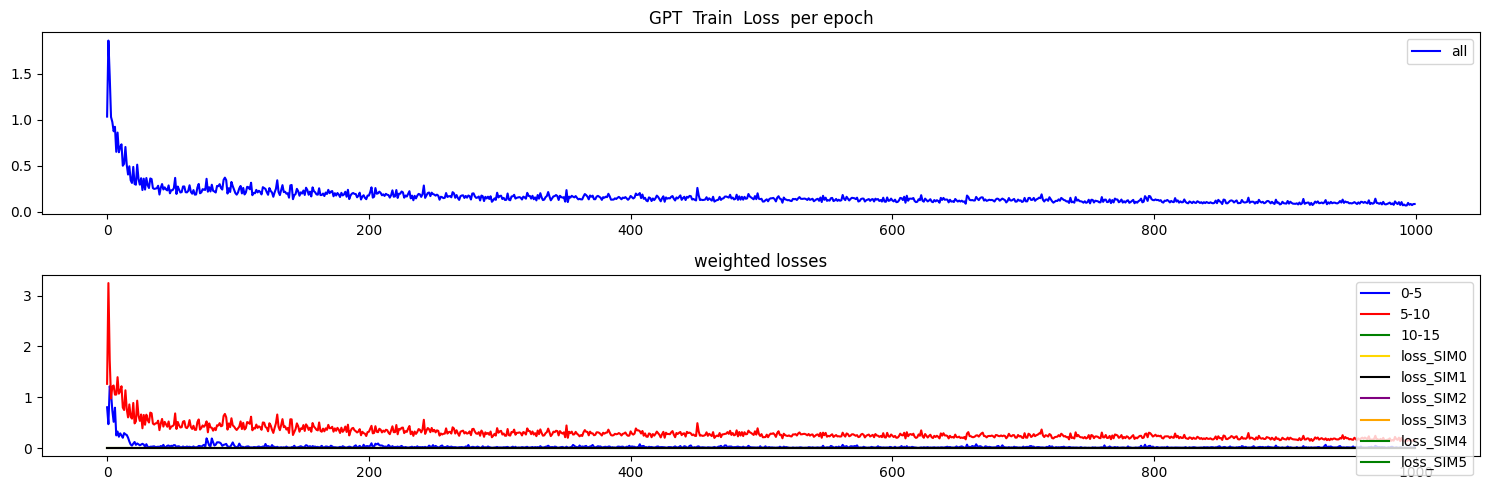

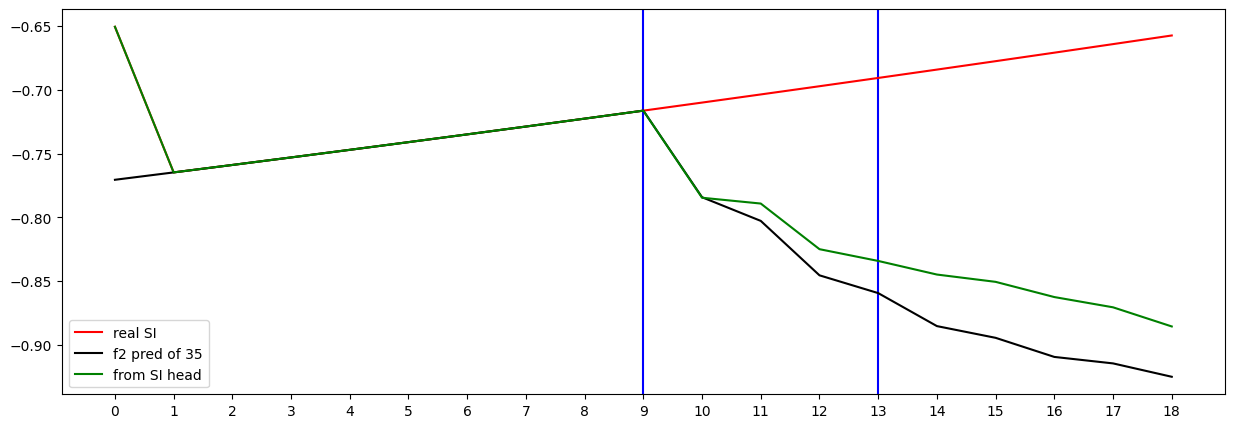

Testing R**2 - (all) - (no inputs):  0.9992928713925289
Testing R**2 - (f2) - SI full (no inputs):  -138.0686688926276
Testing R**2 - SI head only (no inputs):  -95.92971190504747
0 ...index R**2 (no inputs):  -0.5572387076442262
1 ...index R**2 (no inputs):  -5.137843642060175
2 ...index R**2 (no inputs):  -138.0686688926276
3 ...index R**2 (no inputs):  0.7417941079983792
4 ...index R**2 (no inputs):  -106.44308850981729
5 ...index R**2 (no inputs):  -76.29878879768735
6 ...index R**2 (no inputs):  -107.8460584138645
7 ...index R**2 (no inputs):  -1870.4880592661043
8 ...index R**2 (no inputs):  -128.5714488509625
9 ...index R**2 (no inputs):  -0.04513574756516081
10 ...index R**2 (no inputs):  -74.61237158216016
11 ...index R**2 (no inputs):  -19.51543154843142
12 ...index R**2 (no inputs):  -108.37568535929861
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -71.52658773193313
16 ...index R**2 (no inputs):  -0.12083290602008545
17

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.202533
Loss_SI: 1.1374313831329346 Loss_all: 1.2676335573196411
===
[200] Train Loss: 0.141896
Loss_SI: 0.017328081652522087 Loss_all: 0.26646482944488525
===
[400] Train Loss: 0.059467
Loss_SI: 0.008004727773368359 Loss_all: 0.11092902719974518
===
[600] Train Loss: 0.037411
Loss_SI: 0.0077533842995762825 Loss_all: 0.06706918776035309
===
[800] Train Loss: 0.043925
Loss_SI: 0.020645691081881523 Loss_all: 0.06720446050167084
===


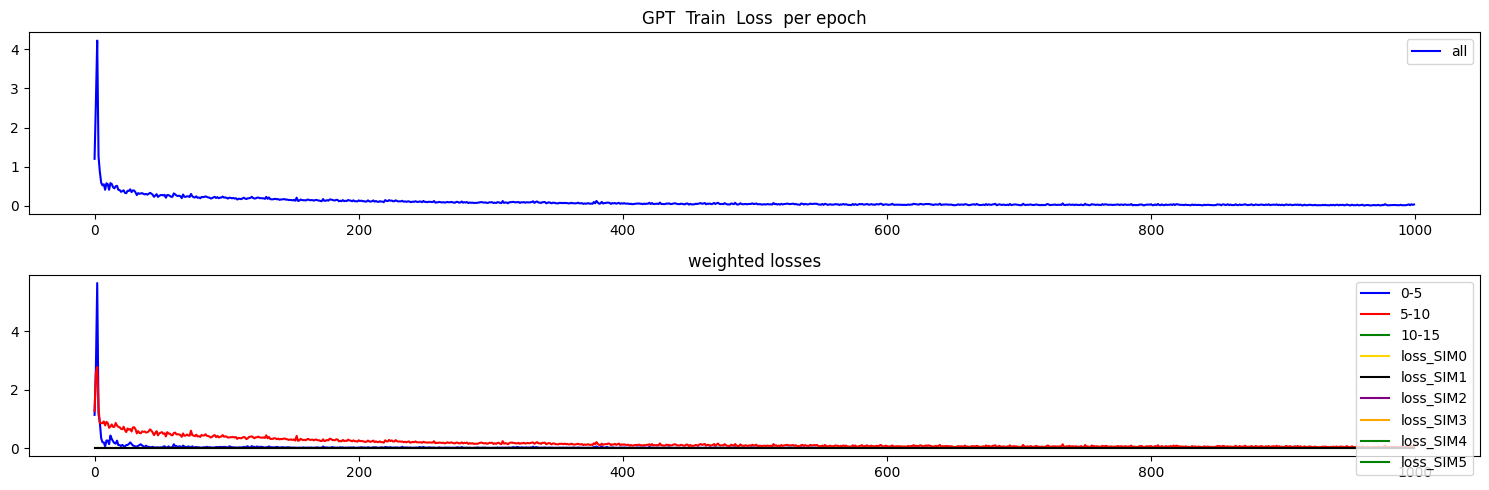

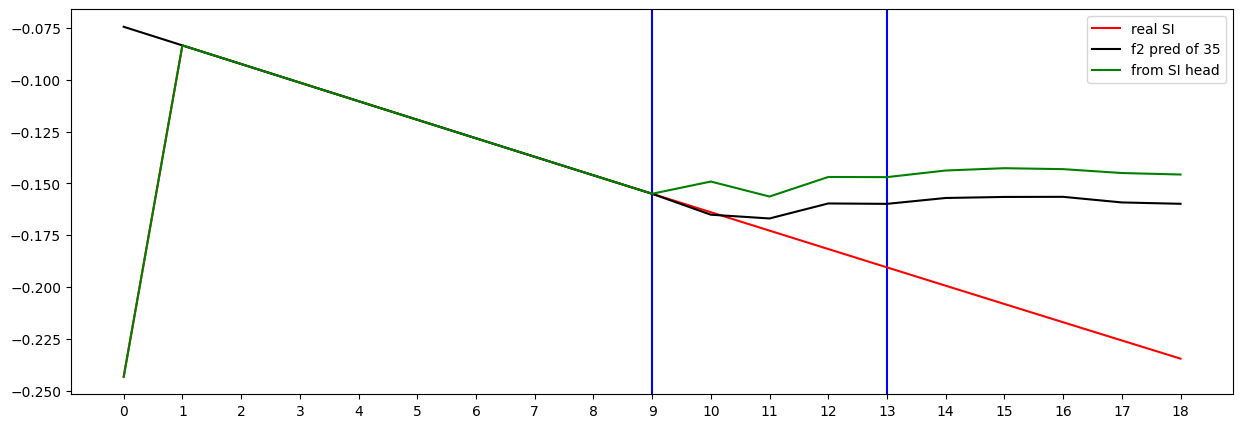

Testing R**2 - (all) - (no inputs):  0.9998891749398094
Testing R**2 - (f2) - SI full (no inputs):  -4.684403955926084
Testing R**2 - SI head only (no inputs):  -7.556227164508099
0 ...index R**2 (no inputs):  -0.858689846453482
1 ...index R**2 (no inputs):  -1.722914629119472
2 ...index R**2 (no inputs):  -4.684403955926084
3 ...index R**2 (no inputs):  -1162.5532212098765
4 ...index R**2 (no inputs):  -538.2697673969711
5 ...index R**2 (no inputs):  -7.212503934487829
6 ...index R**2 (no inputs):  -58.752037458017185
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -10.165485559273197
9 ...index R**2 (no inputs):  -0.09742693066599784
10 ...index R**2 (no inputs):  -15.303283507899867
11 ...index R**2 (no inputs):  -20.268865230936964
12 ...index R**2 (no inputs):  -11.428672577748612
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.350934518053877
16 ...index R**2 (no inputs):  -0.11846984790576598
17 ...index R**

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.344515
Loss_SI: 1.2060283422470093 Loss_all: 1.4830020666122437
===
[200] Train Loss: 0.188908
Loss_SI: 0.010838589631021023 Loss_all: 0.36697763204574585
===
[400] Train Loss: 0.128659
Loss_SI: 0.015231740660965443 Loss_all: 0.2420862913131714
===
[600] Train Loss: 0.080983
Loss_SI: 0.010081758722662926 Loss_all: 0.15188343822956085
===
[800] Train Loss: 0.066320
Loss_SI: 0.006430388893932104 Loss_all: 0.1262100636959076
===


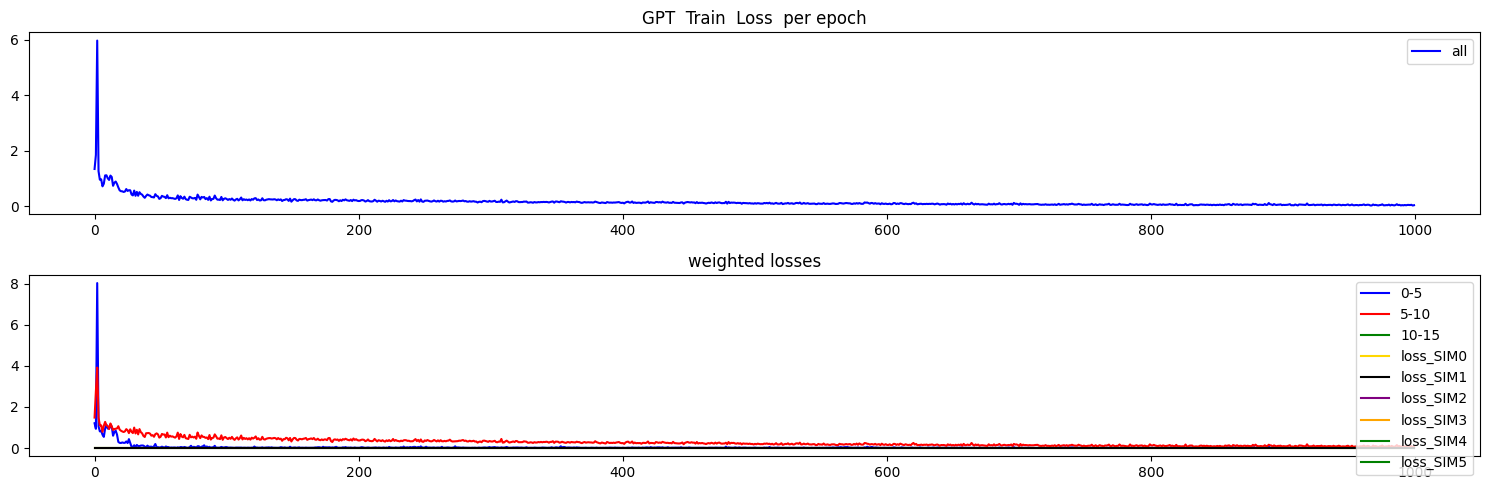

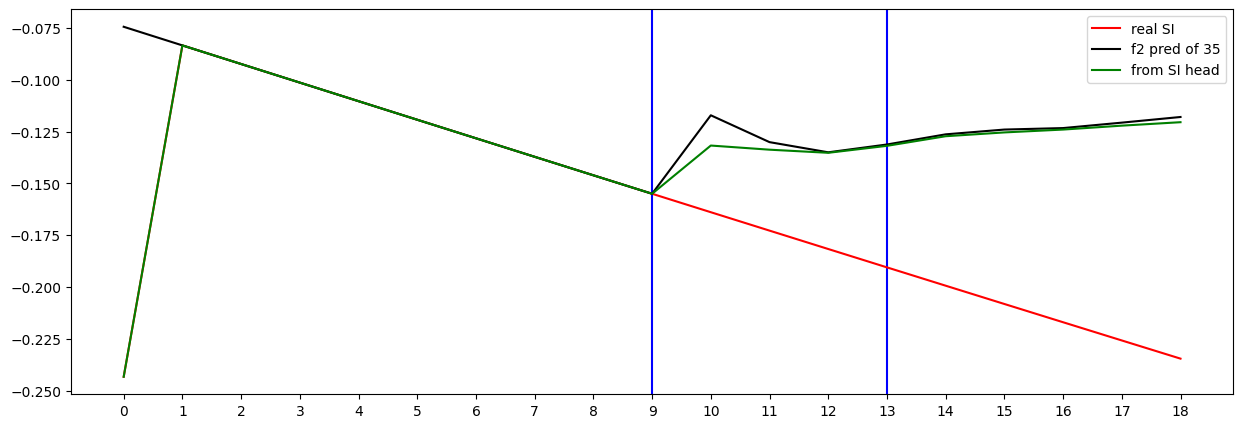

Testing R**2 - (all) - (no inputs):  0.9999378250770897
Testing R**2 - (f2) - SI full (no inputs):  -13.58389054964777
Testing R**2 - SI head only (no inputs):  -12.856808530004574
0 ...index R**2 (no inputs):  -0.1256733163203978
1 ...index R**2 (no inputs):  -1.0378869886278315
2 ...index R**2 (no inputs):  -13.58389054964777
3 ...index R**2 (no inputs):  -43.67935135959849
4 ...index R**2 (no inputs):  -8.761866840184794
5 ...index R**2 (no inputs):  -9.431535970578205
6 ...index R**2 (no inputs):  -1106.1907825095307
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -9.81705295549804
9 ...index R**2 (no inputs):  -0.1726182085060688
10 ...index R**2 (no inputs):  -32.22242772783934
11 ...index R**2 (no inputs):  -105.46564905503978
12 ...index R**2 (no inputs):  -11.253253368036855
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.239650872942797
16 ...index R**2 (no inputs):  -0.4837396956617557
17 ...index R**2 (

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.297313
Loss_SI: 1.368106722831726 Loss_all: 1.2265198230743408
===
[200] Train Loss: 0.309855
Loss_SI: 0.10977902263402939 Loss_all: 0.509930431842804
===
[400] Train Loss: 0.152454
Loss_SI: 0.008746705949306488 Loss_all: 0.2961621880531311
===
[600] Train Loss: 0.128182
Loss_SI: 0.016649886965751648 Loss_all: 0.23971498012542725
===
[800] Train Loss: 0.099576
Loss_SI: 0.013254599645733833 Loss_all: 0.18589819967746735
===


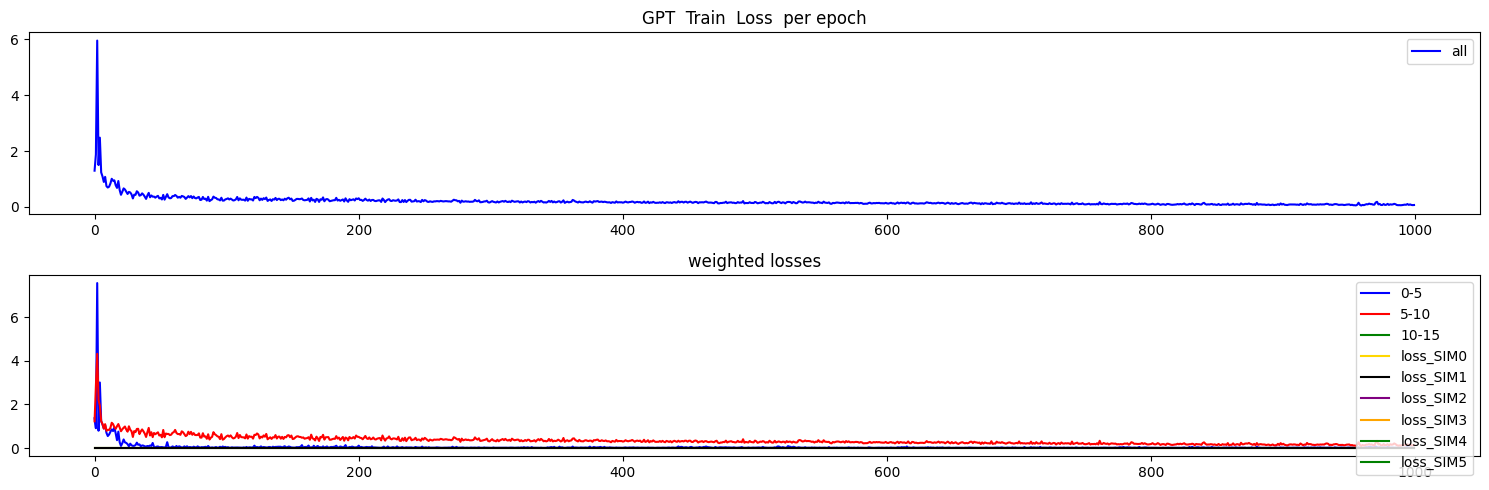

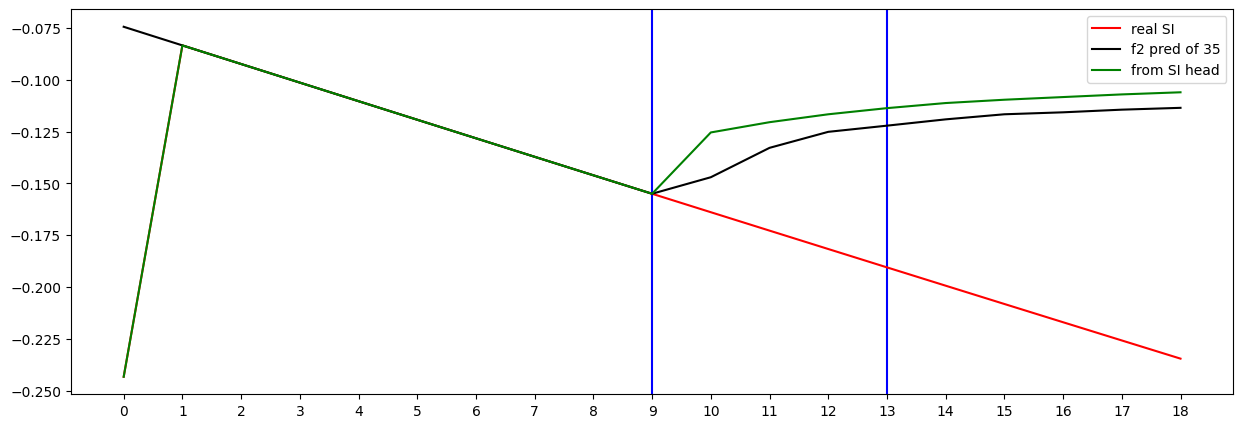

Testing R**2 - (all) - (no inputs):  0.9999322691515938
Testing R**2 - (f2) - SI full (no inputs):  -15.01558406264245
Testing R**2 - SI head only (no inputs):  -18.001133865915804
0 ...index R**2 (no inputs):  -0.2015423734715851
1 ...index R**2 (no inputs):  -0.20823883200547022
2 ...index R**2 (no inputs):  -15.01558406264245
3 ...index R**2 (no inputs):  -122.73133430540808
4 ...index R**2 (no inputs):  -7.098845554457354
5 ...index R**2 (no inputs):  -32.26599436801971
6 ...index R**2 (no inputs):  -701.9127248608488
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -18.28868154636693
9 ...index R**2 (no inputs):  0.017424766902486177
10 ...index R**2 (no inputs):  -188.76732244547657
11 ...index R**2 (no inputs):  -5.563703572629369
12 ...index R**2 (no inputs):  -14.22906607129694
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.606402215125876
16 ...index R**2 (no inputs):  -0.09297811674059897
17 ...index R**

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.363530
Loss_SI: 1.0435699224472046 Loss_all: 1.6834901571273804
===
[200] Train Loss: 0.244712
Loss_SI: 0.011633573099970818 Loss_all: 0.47779104113578796
===
[400] Train Loss: 0.165963
Loss_SI: 0.04213227331638336 Loss_all: 0.28979453444480896
===
[600] Train Loss: 0.156122
Loss_SI: 0.016226641833782196 Loss_all: 0.29601654410362244
===
[800] Train Loss: 0.128109
Loss_SI: 0.03599964827299118 Loss_all: 0.2202175408601761
===


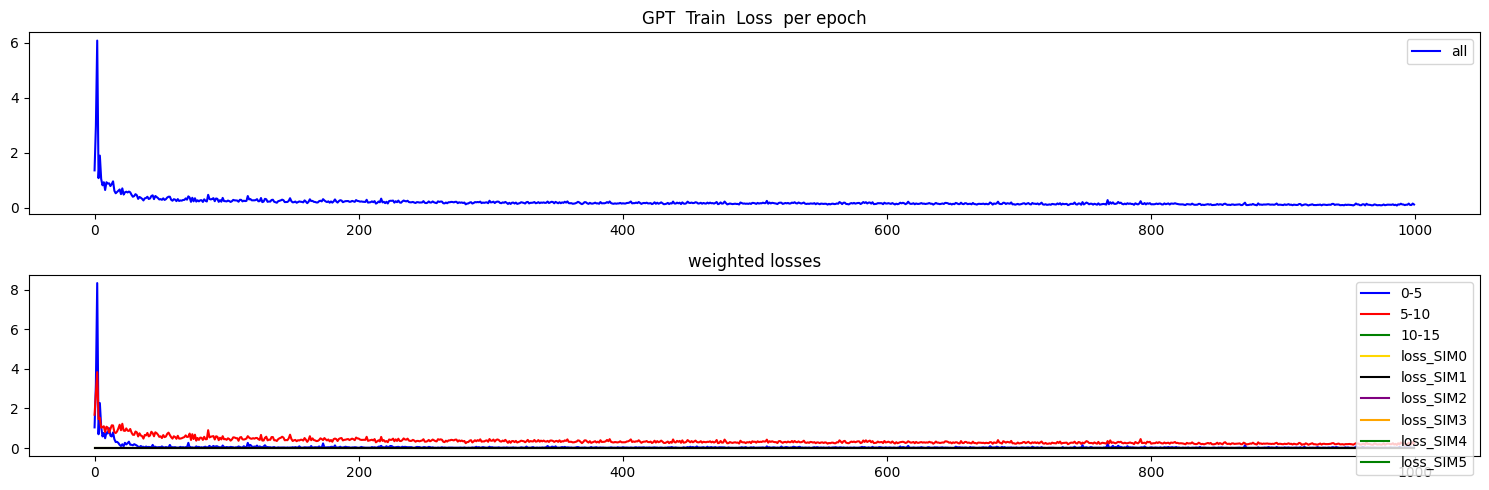

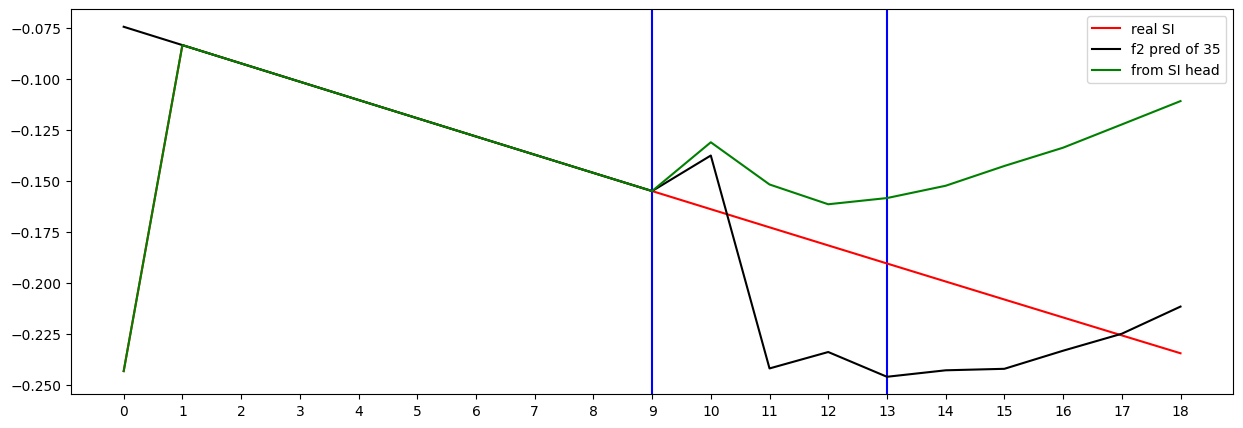

Testing R**2 - (all) - (no inputs):  0.999114809725032
Testing R**2 - (f2) - SI full (no inputs):  -1.5606862033851843
Testing R**2 - SI head only (no inputs):  -10.235186925600258
0 ...index R**2 (no inputs):  -0.3441773730326909
1 ...index R**2 (no inputs):  -2.989557334880644
2 ...index R**2 (no inputs):  -1.5606862033851843
3 ...index R**2 (no inputs):  -1762.4666104004186
4 ...index R**2 (no inputs):  -60.26220124495454
5 ...index R**2 (no inputs):  -1.786498253185191
6 ...index R**2 (no inputs):  -749.3454070601257
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -3.4067099898592366
9 ...index R**2 (no inputs):  0.053303107172782194
10 ...index R**2 (no inputs):  -5866.809987886235
11 ...index R**2 (no inputs):  -67.92704973840458
12 ...index R**2 (no inputs):  -1.5052488389204601
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -620.1299987979822
16 ...index R**2 (no inputs):  -0.029519828568822293
17 ...index R*

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.943871
Loss_SI: 0.564805805683136 Loss_all: 1.3229364156723022
===
[200] Train Loss: 0.178609
Loss_SI: 0.03031834028661251 Loss_all: 0.32690033316612244
===
[400] Train Loss: 0.095020
Loss_SI: 0.014498546719551086 Loss_all: 0.17554160952568054
===
[600] Train Loss: 0.042053
Loss_SI: 0.007521107792854309 Loss_all: 0.07658407092094421
===
[800] Train Loss: 0.056990
Loss_SI: 0.024811167269945145 Loss_all: 0.08916914463043213
===


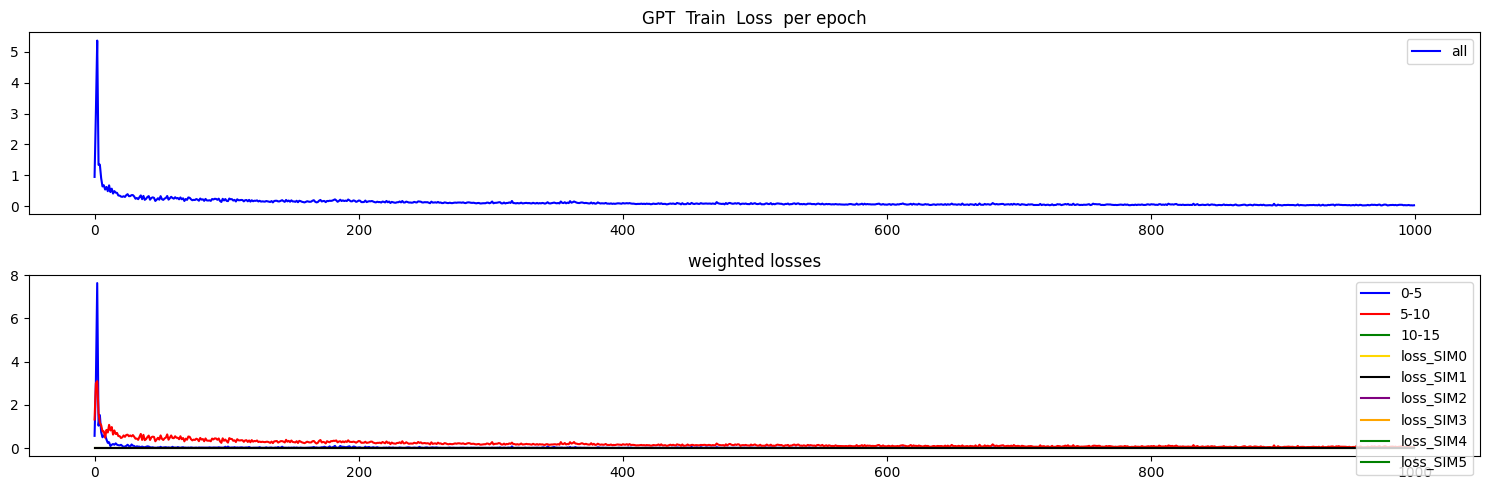

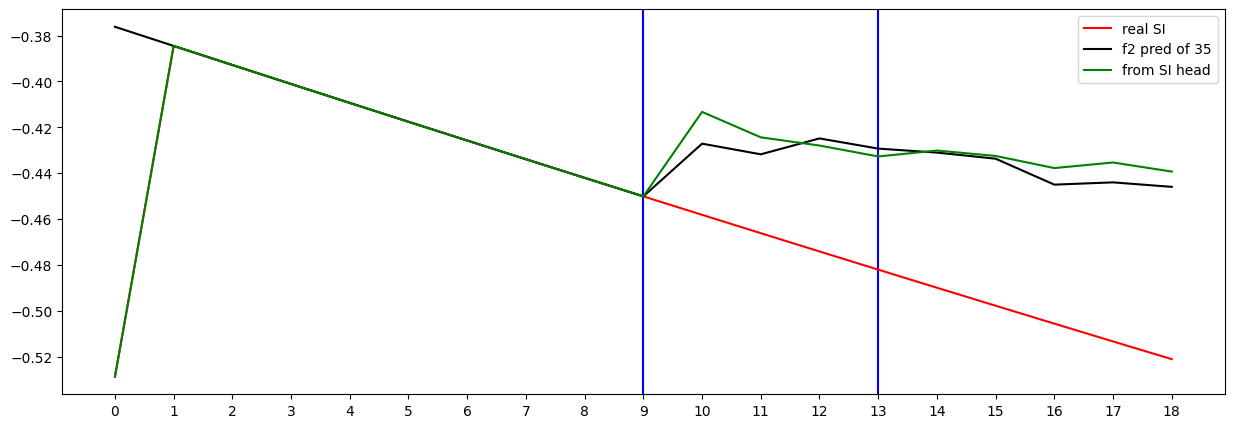

Testing R**2 - (all) - (no inputs):  0.9991374468270832
Testing R**2 - (f2) - SI full (no inputs):  -9.166132444516448
Testing R**2 - SI head only (no inputs):  -10.552481221414636
0 ...index R**2 (no inputs):  0.008853953500016276
1 ...index R**2 (no inputs):  -1.1522451569704302
2 ...index R**2 (no inputs):  -9.166132444516448
3 ...index R**2 (no inputs):  -192.75731040195342
4 ...index R**2 (no inputs):  -1151.1727905454527
5 ...index R**2 (no inputs):  -10.551956865549954
6 ...index R**2 (no inputs):  -1808.565308347944
7 ...index R**2 (no inputs):  -579.0116258848938
8 ...index R**2 (no inputs):  -15.677716438481557
9 ...index R**2 (no inputs):  -2.1736305886601937
10 ...index R**2 (no inputs):  -8.473296625173163
11 ...index R**2 (no inputs):  -10.128020124554935
12 ...index R**2 (no inputs):  -7.245556251872596
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.238087210484576
16 ...index R**2 (no inputs):  -7.562674523566056


In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.361776
Loss_SI: 1.2824324369430542 Loss_all: 1.44111967086792
===
[200] Train Loss: 0.124516
Loss_SI: 0.021464258432388306 Loss_all: 0.22756752371788025
===
[400] Train Loss: 0.134396
Loss_SI: 0.041823845356702805 Loss_all: 0.22696781158447266
===
[600] Train Loss: 0.117745
Loss_SI: 0.008129180409014225 Loss_all: 0.22736172378063202
===
[800] Train Loss: 0.079559
Loss_SI: 0.010225332342088223 Loss_all: 0.14889225363731384
===


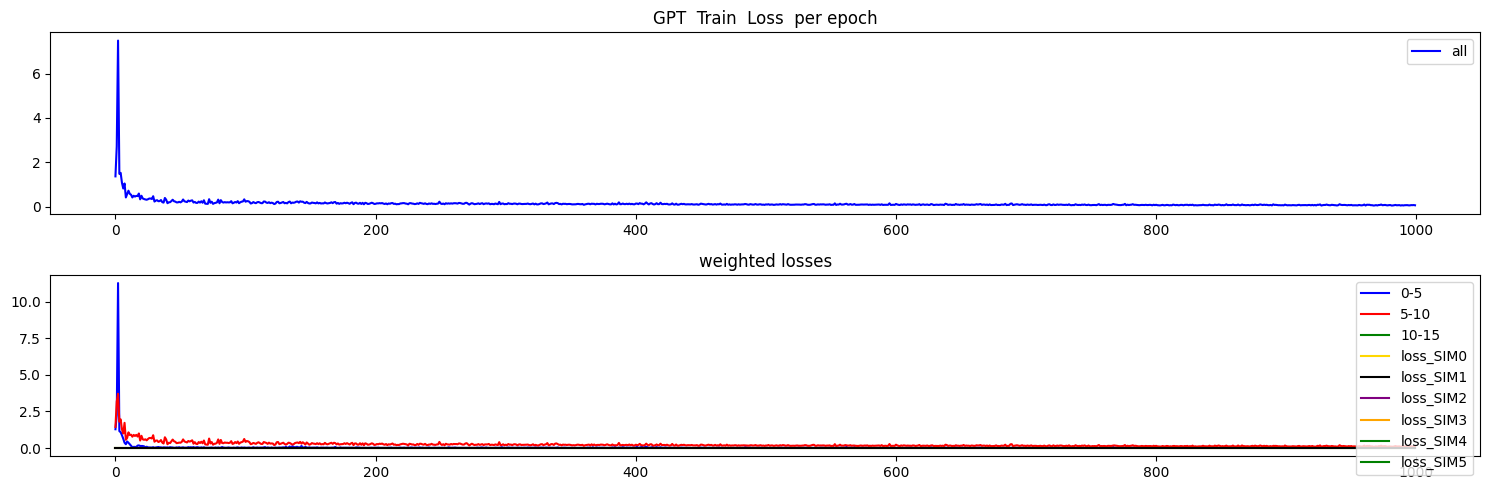

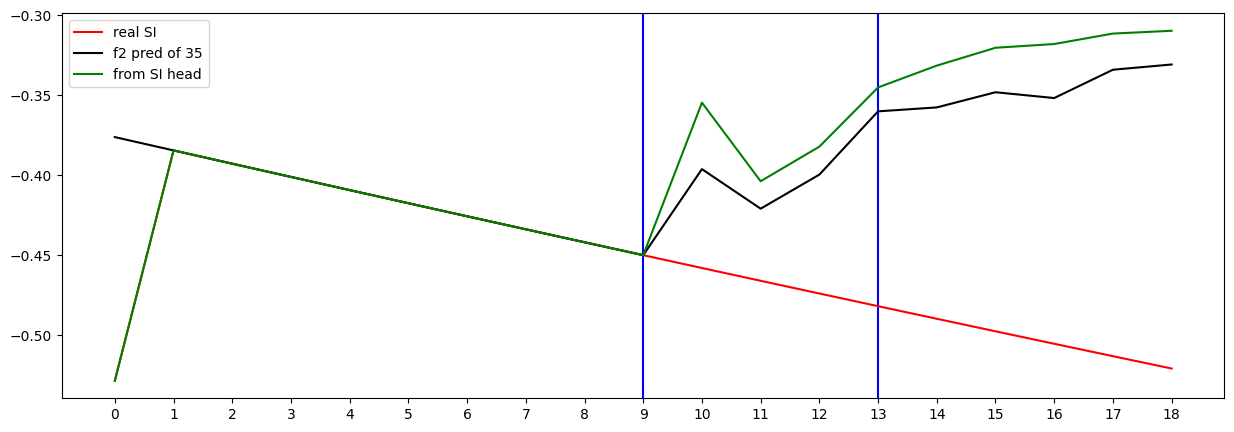

Testing R**2 - (all) - (no inputs):  0.9994222059521867
Testing R**2 - (f2) - SI full (no inputs):  -46.930341901160965
Testing R**2 - SI head only (no inputs):  -64.45709497167748
0 ...index R**2 (no inputs):  -0.0772719245318616
1 ...index R**2 (no inputs):  -1.7929361056930175
2 ...index R**2 (no inputs):  -46.930341901160965
3 ...index R**2 (no inputs):  -1410.3854320073008
4 ...index R**2 (no inputs):  -774.7575438516652
5 ...index R**2 (no inputs):  -19.050225183637977
6 ...index R**2 (no inputs):  -460.76166359289476
7 ...index R**2 (no inputs):  -44501.03005388472
8 ...index R**2 (no inputs):  -25.66211377443581
9 ...index R**2 (no inputs):  -1.0340737292417295
10 ...index R**2 (no inputs):  -28.875568070061018
11 ...index R**2 (no inputs):  -19.100644947598056
12 ...index R**2 (no inputs):  -31.304034385905595
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -53.44895008206345
16 ...index R**2 (no inputs):  -4.440527592799941

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.133885
Loss_SI: 0.9851614832878113 Loss_all: 1.2826085090637207
===
[200] Train Loss: 0.159162
Loss_SI: 0.04086748883128166 Loss_all: 0.277456670999527
===
[400] Train Loss: 0.092531
Loss_SI: 0.010842708870768547 Loss_all: 0.17422011494636536
===
[600] Train Loss: 0.103695
Loss_SI: 0.012346122413873672 Loss_all: 0.19504442811012268
===
[800] Train Loss: 0.073982
Loss_SI: 0.008861526846885681 Loss_all: 0.13910327851772308
===


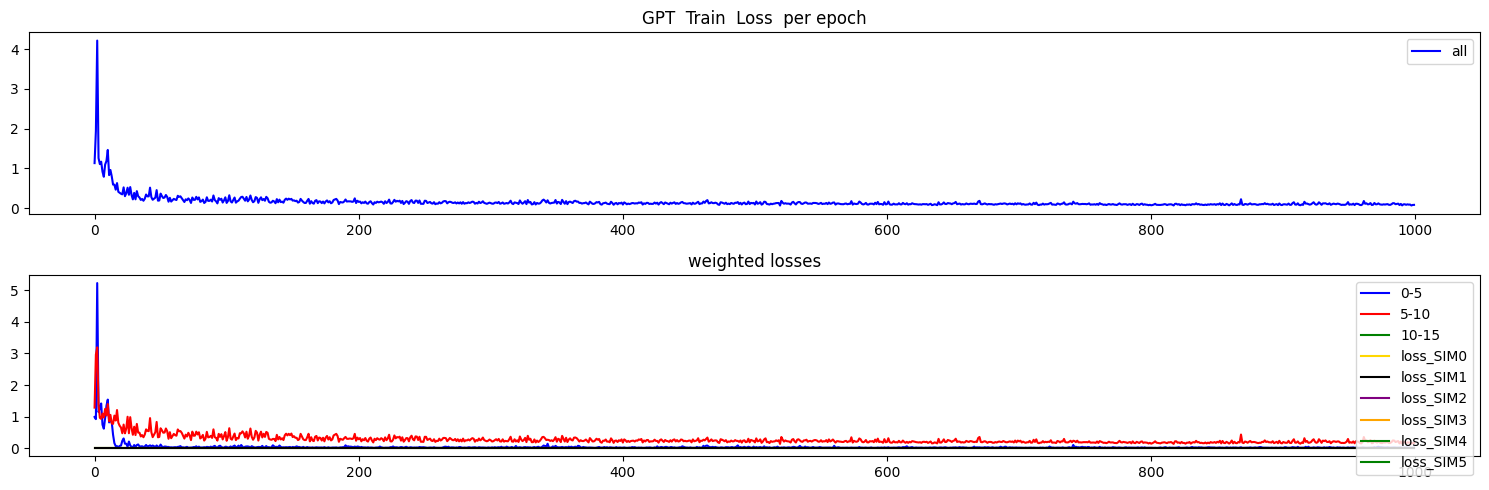

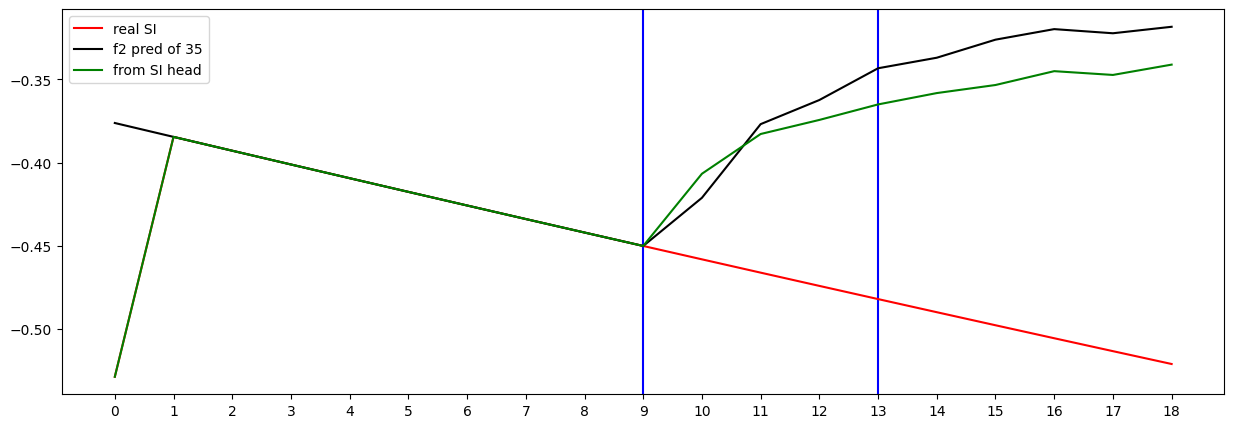

Testing R**2 - (all) - (no inputs):  0.9991771445487951
Testing R**2 - (f2) - SI full (no inputs):  -60.69593807926459
Testing R**2 - SI head only (no inputs):  -46.76076673827696
0 ...index R**2 (no inputs):  -0.017811891735382446
1 ...index R**2 (no inputs):  -1.572343785326117
2 ...index R**2 (no inputs):  -60.69593807926459
3 ...index R**2 (no inputs):  -31.965278172517536
4 ...index R**2 (no inputs):  -233.71248335117522
5 ...index R**2 (no inputs):  -47.25122793936184
6 ...index R**2 (no inputs):  -676.3456932139709
7 ...index R**2 (no inputs):  -9839.483987761925
8 ...index R**2 (no inputs):  -53.65912629273258
9 ...index R**2 (no inputs):  -0.3118374989384567
10 ...index R**2 (no inputs):  -54.27939310511166
11 ...index R**2 (no inputs):  -81.729773919728
12 ...index R**2 (no inputs):  -50.51063092998158
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -65.48961169520342
16 ...index R**2 (no inputs):  -6.359936465685393
17 ...

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.284285
Loss_SI: 0.9753724932670593 Loss_all: 1.5931978225708008
===
[200] Train Loss: 0.173063
Loss_SI: 0.02160813845694065 Loss_all: 0.3245183825492859
===
[400] Train Loss: 0.132122
Loss_SI: 0.016874149441719055 Loss_all: 0.24736973643302917
===
[600] Train Loss: 0.184482
Loss_SI: 0.01909578964114189 Loss_all: 0.34986838698387146
===
[800] Train Loss: 0.087075
Loss_SI: 0.007984922267496586 Loss_all: 0.16616585850715637
===


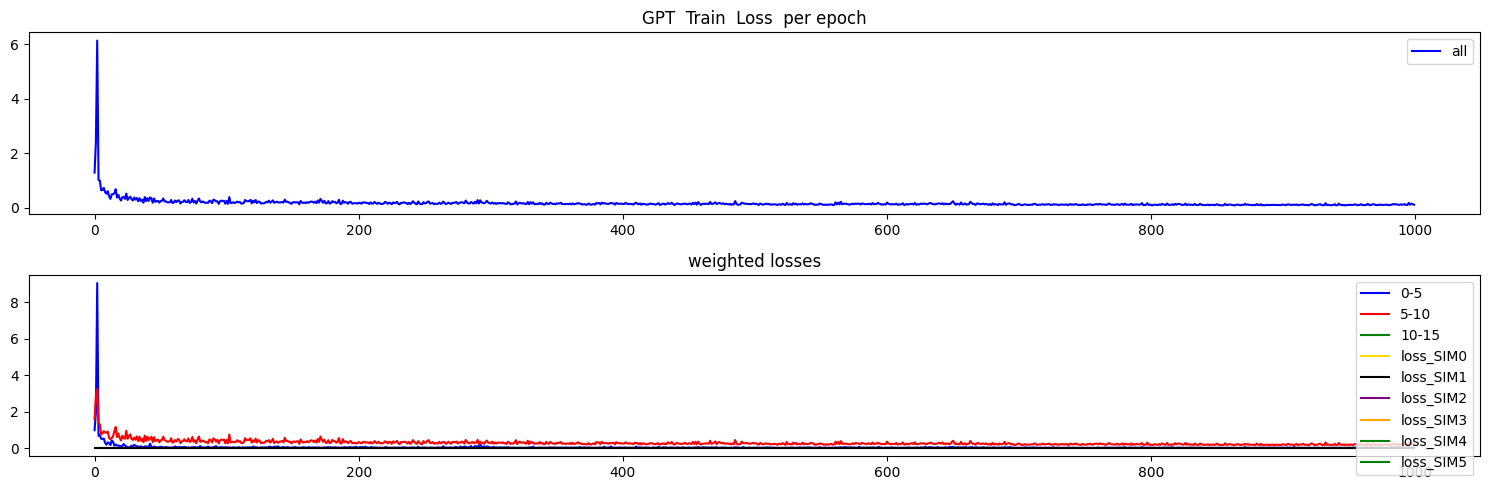

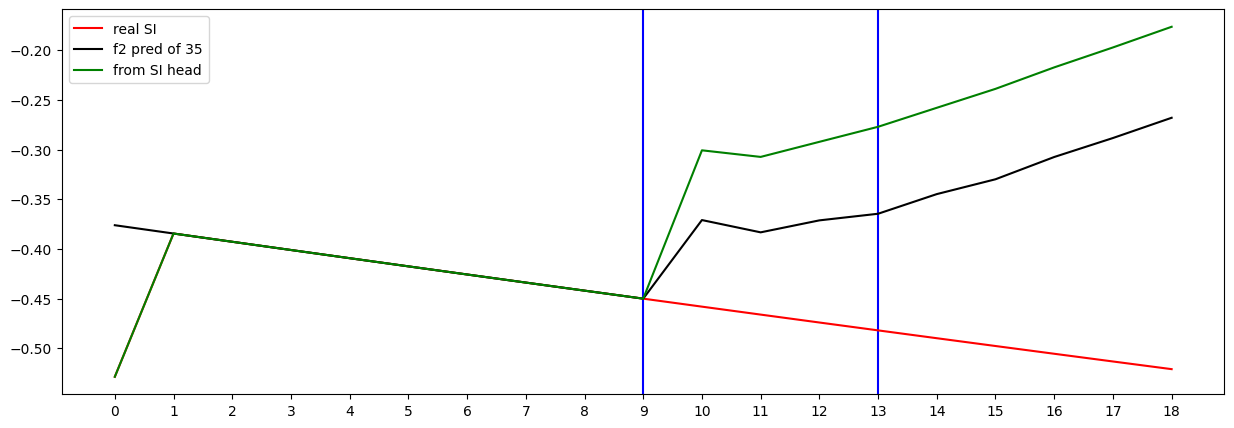

Testing R**2 - (all) - (no inputs):  0.9524011510869482
Testing R**2 - (f2) - SI full (no inputs):  -70.84156215147613
Testing R**2 - SI head only (no inputs):  -157.32374413740467
0 ...index R**2 (no inputs):  0.0070669904213217505
1 ...index R**2 (no inputs):  -0.9066439576256231
2 ...index R**2 (no inputs):  -70.84156215147613
3 ...index R**2 (no inputs):  -77.08635607398638
4 ...index R**2 (no inputs):  -453.3807558956663
5 ...index R**2 (no inputs):  -57.36362578897612
6 ...index R**2 (no inputs):  -138.02899893587073
7 ...index R**2 (no inputs):  -357526.16218581406
8 ...index R**2 (no inputs):  -51.65710001315235
9 ...index R**2 (no inputs):  -0.2220864381376879
10 ...index R**2 (no inputs):  -2566.1834960572137
11 ...index R**2 (no inputs):  -667.6020531148024
12 ...index R**2 (no inputs):  -51.437653053137936
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7704.349089540067
16 ...index R**2 (no inputs):  -0.7465304935676442

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.028898
Loss_SI: 0.8214784860610962 Loss_all: 1.2363171577453613
===
[200] Train Loss: 0.153885
Loss_SI: 0.026930371299386024 Loss_all: 0.28083884716033936
===
[400] Train Loss: 0.055221
Loss_SI: 0.011483514681458473 Loss_all: 0.09895922243595123
===
[600] Train Loss: 0.053401
Loss_SI: 0.014215906150639057 Loss_all: 0.09258662164211273
===
[800] Train Loss: 0.027282
Loss_SI: 0.007973512634634972 Loss_all: 0.046591028571128845
===


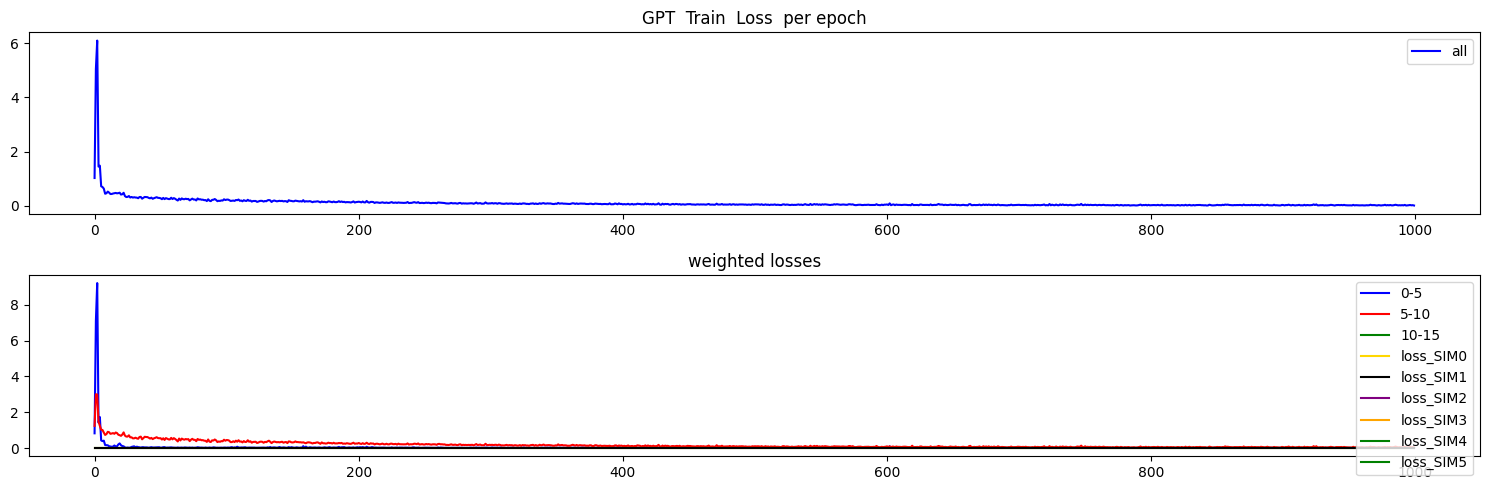

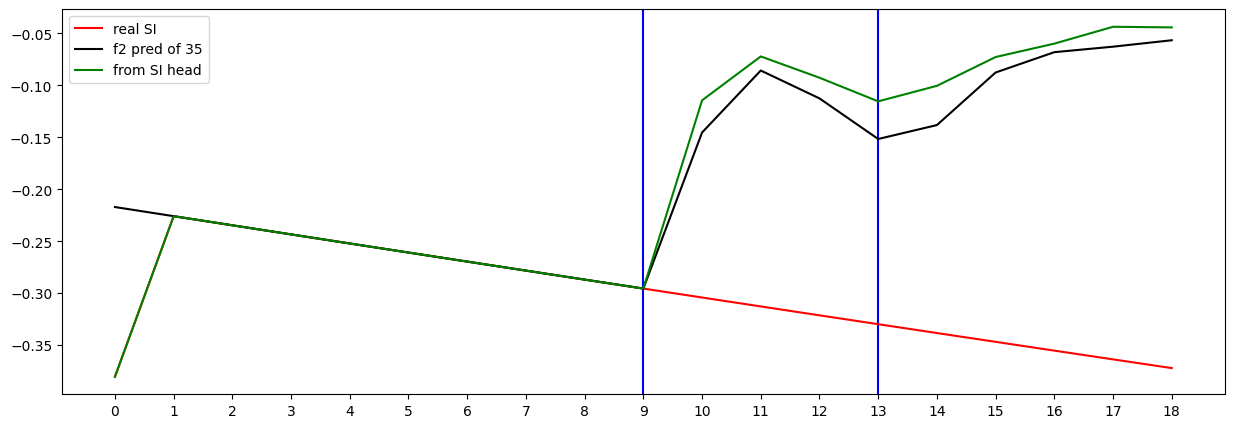

Testing R**2 - (all) - (no inputs):  0.9983298158661411
Testing R**2 - (f2) - SI full (no inputs):  -131.36177058339004
Testing R**2 - SI head only (no inputs):  -152.88239176737073
0 ...index R**2 (no inputs):  -6.887888176866171
1 ...index R**2 (no inputs):  -4.414035954005071
2 ...index R**2 (no inputs):  -131.36177058339004
3 ...index R**2 (no inputs):  -55780.52091055928
4 ...index R**2 (no inputs):  -4547.273931192855
5 ...index R**2 (no inputs):  -120.25347376620469
6 ...index R**2 (no inputs):  -3884.6046482867796
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -159.54034072996865
9 ...index R**2 (no inputs):  -0.15728864756639682
10 ...index R**2 (no inputs):  -43.20749171028176
11 ...index R**2 (no inputs):  -118.637952740491
12 ...index R**2 (no inputs):  -149.16180995819553
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -269.0293046393569
16 ...index R**2 (no inputs):  -9.490661815213189
17 ...index R**2 

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.045178
Loss_SI: 0.8833996057510376 Loss_all: 1.2069573402404785
===
[200] Train Loss: 0.213821
Loss_SI: 0.029994040727615356 Loss_all: 0.39764830470085144
===
[400] Train Loss: 0.147486
Loss_SI: 0.017477363348007202 Loss_all: 0.27749523520469666
===
[600] Train Loss: 0.108605
Loss_SI: 0.018906552344560623 Loss_all: 0.19830308854579926
===
[800] Train Loss: 0.048013
Loss_SI: 0.003379593137651682 Loss_all: 0.09264710545539856
===


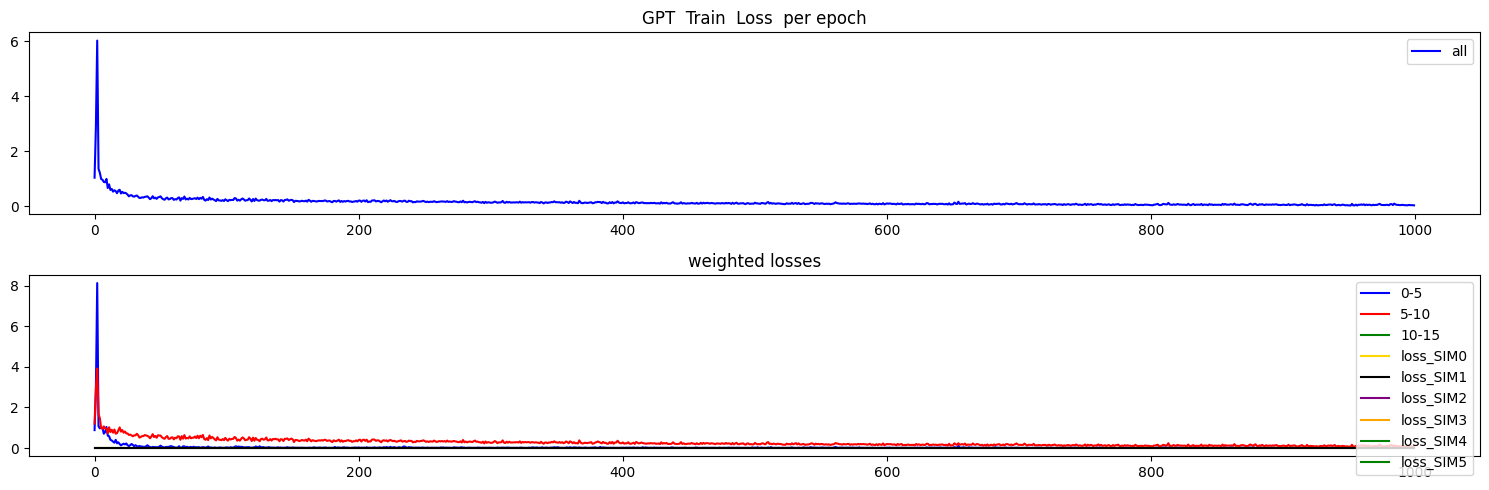

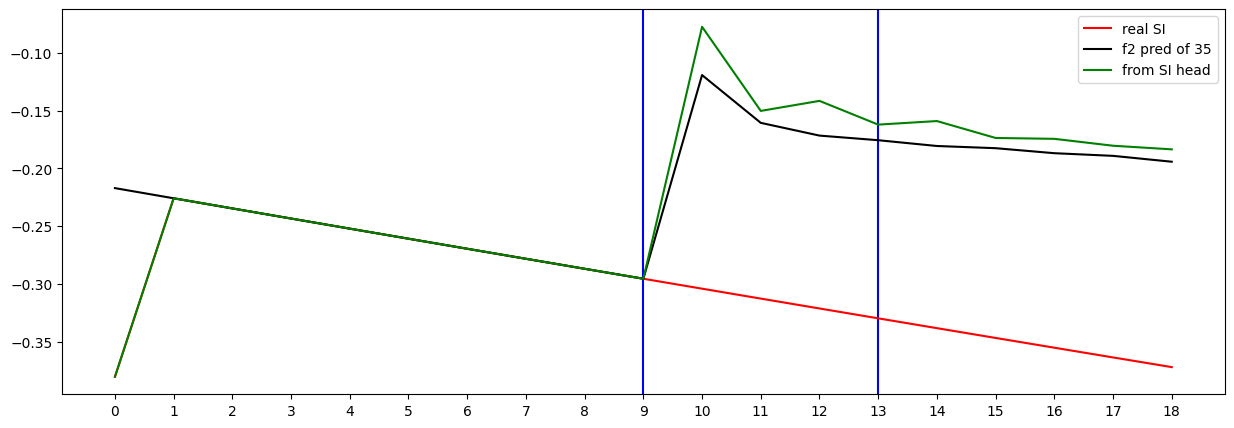

Testing R**2 - (all) - (no inputs):  0.9998434834858817
Testing R**2 - (f2) - SI full (no inputs):  -62.234175337877105
Testing R**2 - SI head only (no inputs):  -75.98751076865716
0 ...index R**2 (no inputs):  -1.1142538296427933
1 ...index R**2 (no inputs):  -1.2113704217628545
2 ...index R**2 (no inputs):  -62.234175337877105
3 ...index R**2 (no inputs):  -776.357962295551
4 ...index R**2 (no inputs):  -52.314903377073016
5 ...index R**2 (no inputs):  -61.577410156548126
6 ...index R**2 (no inputs):  -138.21299737528534
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -42.464365534679075
9 ...index R**2 (no inputs):  -0.4928578609997345
10 ...index R**2 (no inputs):  -25.05197261708021
11 ...index R**2 (no inputs):  -31.744585754473043
12 ...index R**2 (no inputs):  -56.4004797537906
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -95.05978091768736
16 ...index R**2 (no inputs):  -0.8068338553021441
17 ...index R**2

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.465726
Loss_SI: 1.3975940942764282 Loss_all: 1.5338574647903442
===
[200] Train Loss: 0.171742
Loss_SI: 0.022891327738761902 Loss_all: 0.3205925226211548
===
[400] Train Loss: 0.145148
Loss_SI: 0.04130852222442627 Loss_all: 0.24898789823055267
===
[600] Train Loss: 0.132280
Loss_SI: 0.0167709868401289 Loss_all: 0.24778904020786285
===
[800] Train Loss: 0.070199
Loss_SI: 0.004386405926197767 Loss_all: 0.13601157069206238
===


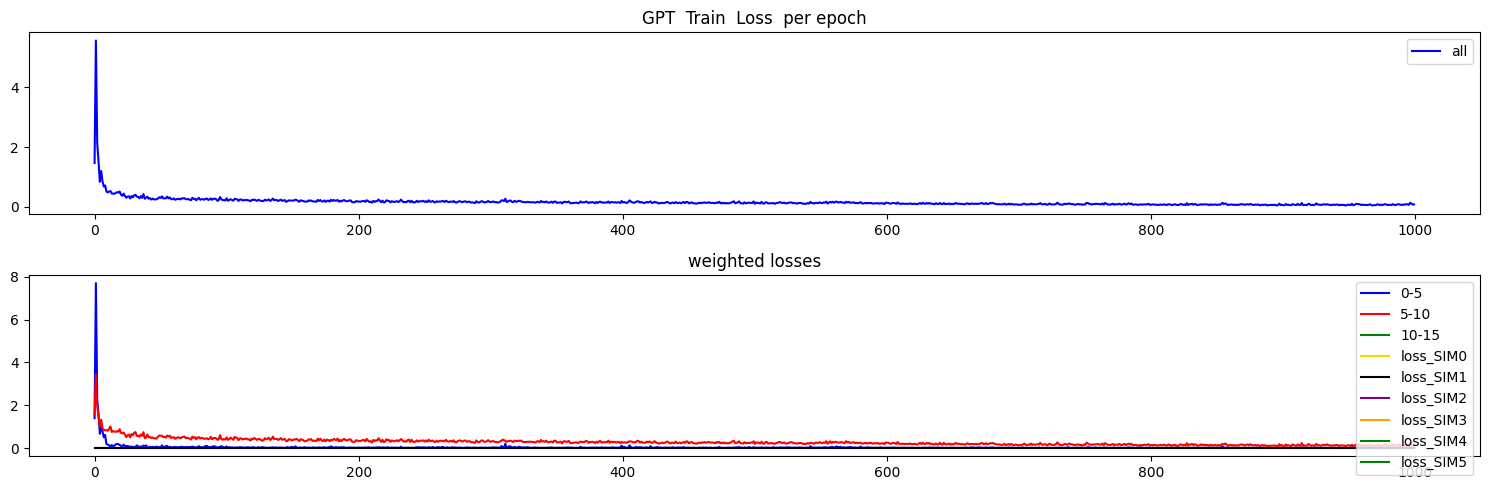

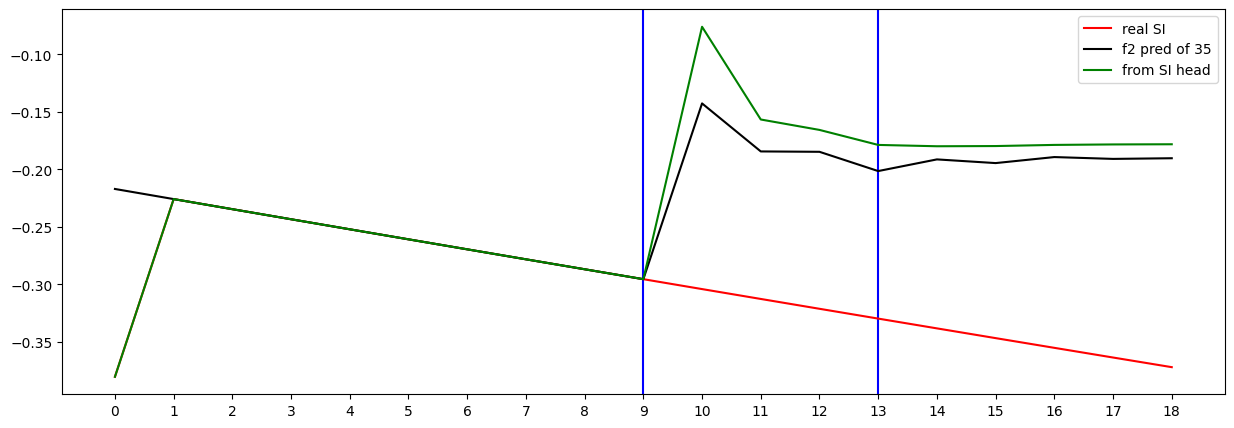

Testing R**2 - (all) - (no inputs):  0.9997965426163987
Testing R**2 - (f2) - SI full (no inputs):  -54.10281994124001
Testing R**2 - SI head only (no inputs):  -70.41059359682846
0 ...index R**2 (no inputs):  -1.8874489748589824
1 ...index R**2 (no inputs):  -2.2621310511265924
2 ...index R**2 (no inputs):  -54.10281994124001
3 ...index R**2 (no inputs):  -188.8762460459933
4 ...index R**2 (no inputs):  -37.88304022764755
5 ...index R**2 (no inputs):  -78.56789877703173
6 ...index R**2 (no inputs):  -351.0926332282386
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -52.79161103090932
9 ...index R**2 (no inputs):  -0.1878489711699065
10 ...index R**2 (no inputs):  -27.93647030621258
11 ...index R**2 (no inputs):  -3.5215395241022094
12 ...index R**2 (no inputs):  -32.50268042922885
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -286.9008833727513
16 ...index R**2 (no inputs):  -1.3159405385258767
17 ...index R**2 (no

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.130616
Loss_SI: 0.9431633353233337 Loss_all: 1.3180689811706543
===
[200] Train Loss: 0.217425
Loss_SI: 0.01691575162112713 Loss_all: 0.4179336130619049
===
[400] Train Loss: 0.165461
Loss_SI: 0.01613571308553219 Loss_all: 0.31478530168533325
===
[600] Train Loss: 0.158953
Loss_SI: 0.010477205738425255 Loss_all: 0.30742788314819336
===
[800] Train Loss: 0.163530
Loss_SI: 0.03622899577021599 Loss_all: 0.29083043336868286
===


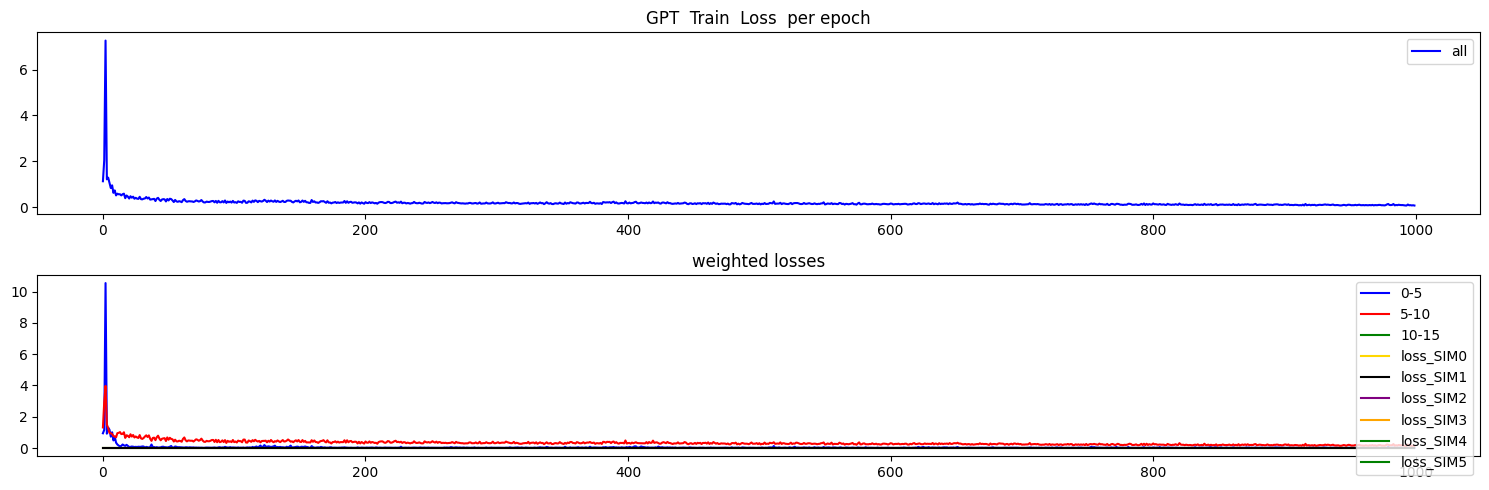

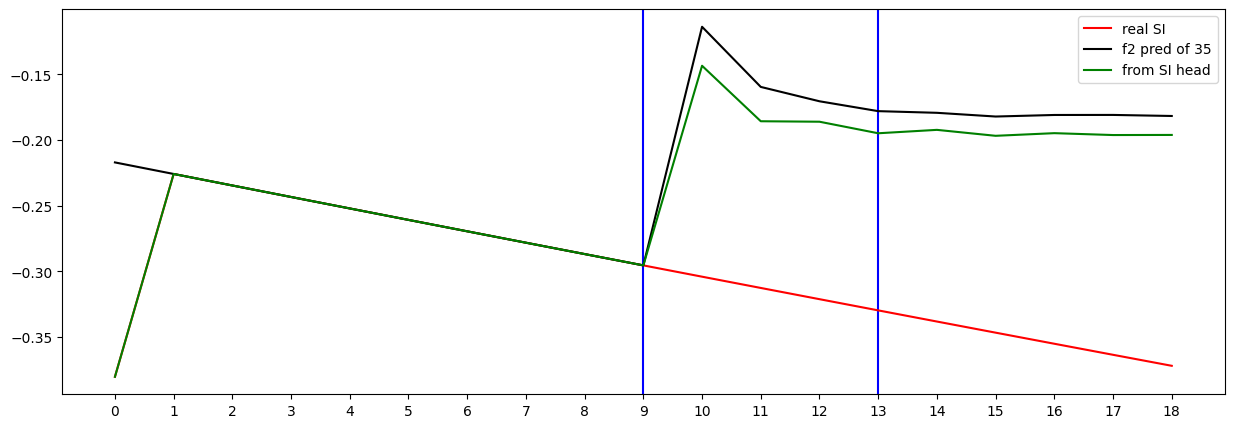

Testing R**2 - (all) - (no inputs):  0.9998155537702559
Testing R**2 - (f2) - SI full (no inputs):  -65.18753108981878
Testing R**2 - SI head only (no inputs):  -52.69911669592714
0 ...index R**2 (no inputs):  -0.7455233998599142
1 ...index R**2 (no inputs):  -2.7009832856936824
2 ...index R**2 (no inputs):  -65.18753108981878
3 ...index R**2 (no inputs):  -15.870186749761078
4 ...index R**2 (no inputs):  -23.590720593780826
5 ...index R**2 (no inputs):  -59.0962325855798
6 ...index R**2 (no inputs):  -7.2104694005736665
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -50.471549719987685
9 ...index R**2 (no inputs):  -0.11769247537729877
10 ...index R**2 (no inputs):  -653.4234420056739
11 ...index R**2 (no inputs):  -101.89258916391518
12 ...index R**2 (no inputs):  -74.52254749297691
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -25.946005718686326
16 ...index R**2 (no inputs):  -1.5122694702993376
17 ...index R**

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 0.814568
Loss_SI: 0.4622727334499359 Loss_all: 1.1668634414672852
===
[200] Train Loss: 0.121492
Loss_SI: 0.012711579911410809 Loss_all: 0.2302727848291397
===
[400] Train Loss: 0.073874
Loss_SI: 0.01750813238322735 Loss_all: 0.13023941218852997
===
[600] Train Loss: 0.052064
Loss_SI: 0.041954562067985535 Loss_all: 0.062172986567020416
===
[800] Train Loss: 0.059797
Loss_SI: 0.008415582589805126 Loss_all: 0.11117774993181229
===


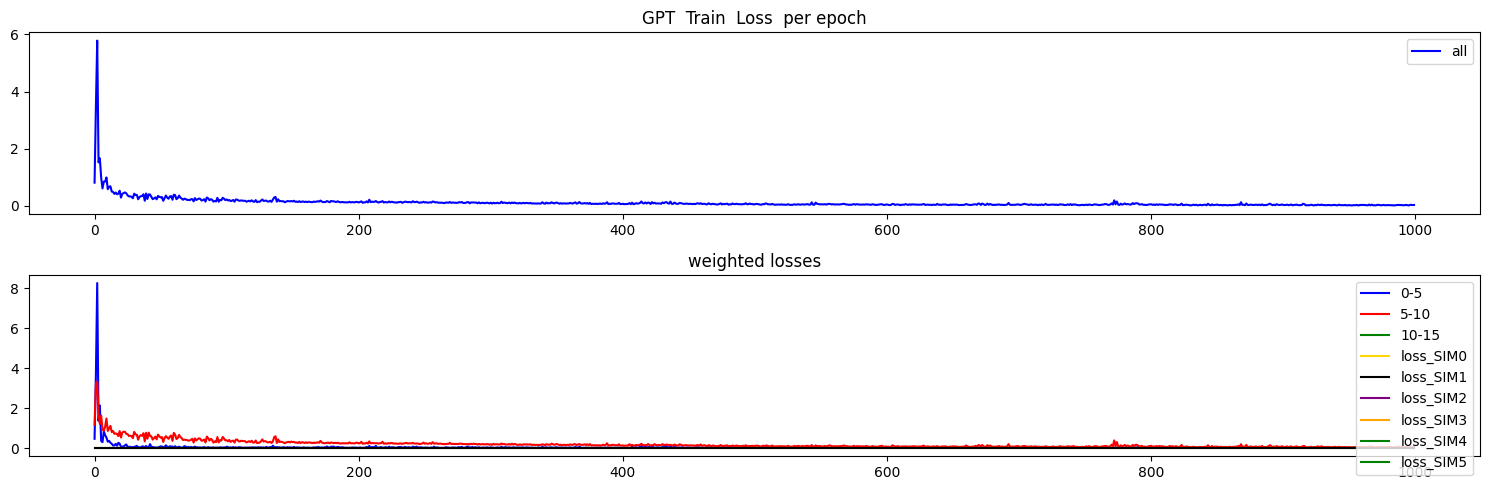

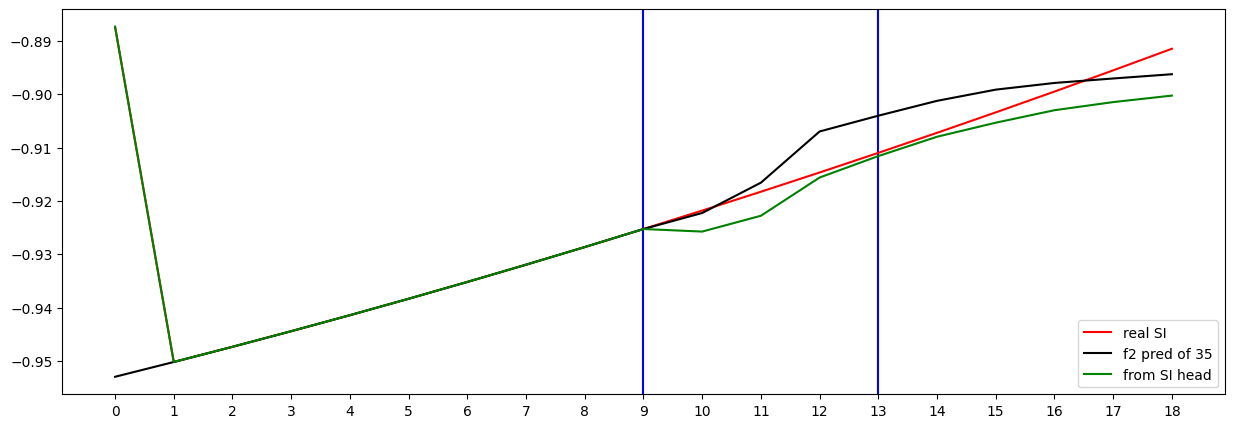

Testing R**2 - (all) - (no inputs):  0.9997258231040692
Testing R**2 - (f2) - SI full (no inputs):  0.8144534732425779
Testing R**2 - SI head only (no inputs):  0.39906231259651903
0 ...index R**2 (no inputs):  -0.15449261983802032
1 ...index R**2 (no inputs):  -0.5912988805595336
2 ...index R**2 (no inputs):  0.8144534732425779
3 ...index R**2 (no inputs):  0.18782429924752642
4 ...index R**2 (no inputs):  -1.1940066778595066
5 ...index R**2 (no inputs):  0.7889764545906319
6 ...index R**2 (no inputs):  -0.2556550065377754
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.8242989319446589
9 ...index R**2 (no inputs):  -0.6289193784246745
10 ...index R**2 (no inputs):  -484.14014688283095
11 ...index R**2 (no inputs):  -5.4913364426763085
12 ...index R**2 (no inputs):  0.8867230125760085
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -187.1121302290911
16 ...index R**2 (no inputs):  -0.4589379460599483
17 ...index R*

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 0.956598
Loss_SI: 0.7474752068519592 Loss_all: 1.1657211780548096
===
[200] Train Loss: 0.160686
Loss_SI: 0.019775189459323883 Loss_all: 0.3015963137149811
===
[400] Train Loss: 0.103724
Loss_SI: 0.012705454602837563 Loss_all: 0.19474294781684875
===
[600] Train Loss: 0.108942
Loss_SI: 0.05597521737217903 Loss_all: 0.16190975904464722
===
[800] Train Loss: 0.047468
Loss_SI: 0.01472040917724371 Loss_all: 0.08021651208400726
===


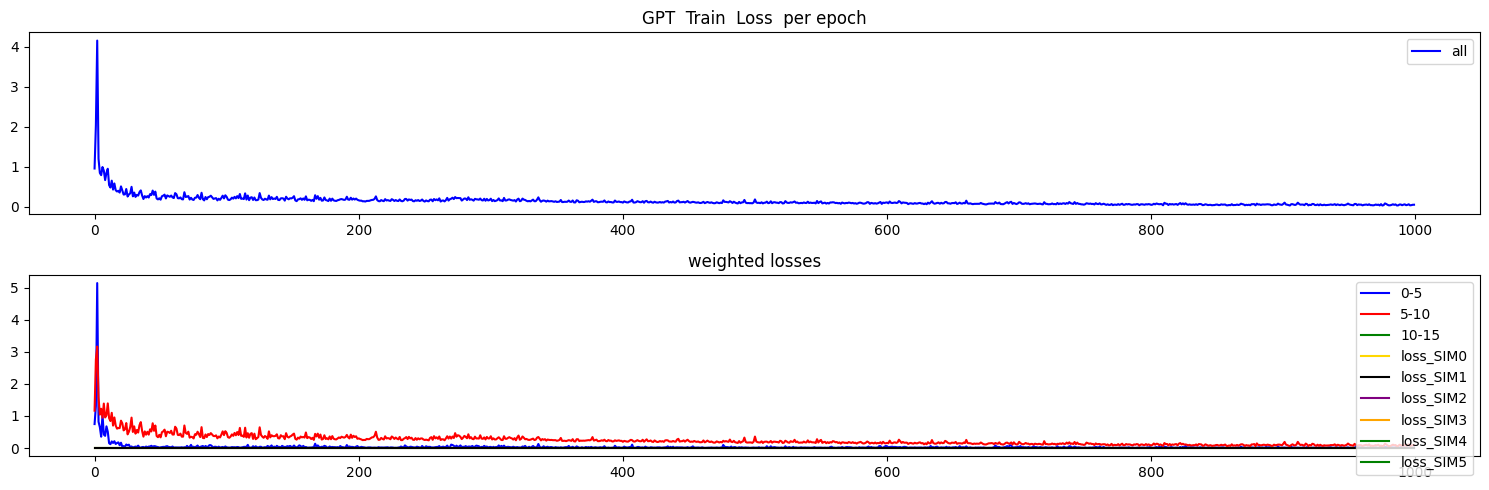

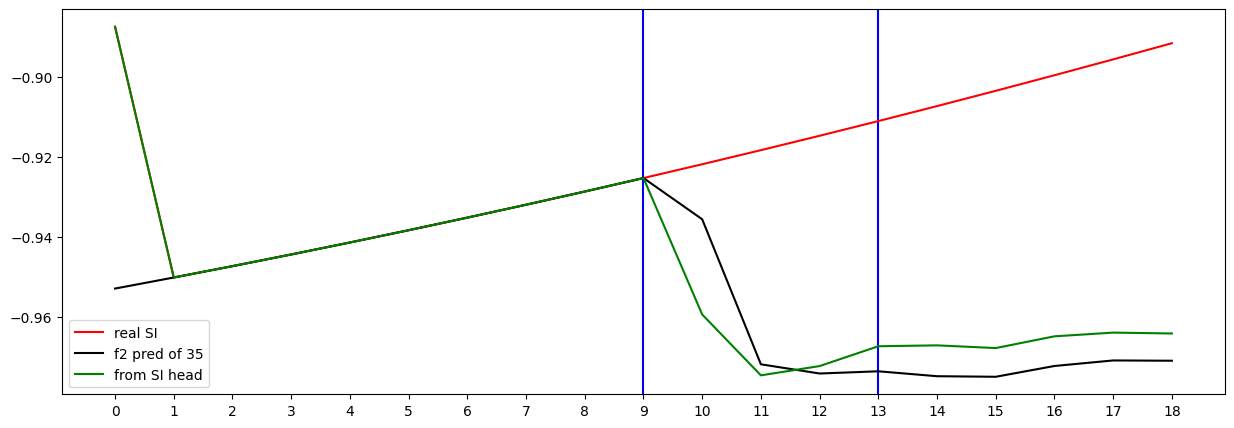

Testing R**2 - (all) - (no inputs):  0.9999335779646
Testing R**2 - (f2) - SI full (no inputs):  -45.8933875374362
Testing R**2 - SI head only (no inputs):  -40.72753599531233
0 ...index R**2 (no inputs):  -3.294094441791894
1 ...index R**2 (no inputs):  -27.847065219074207
2 ...index R**2 (no inputs):  -45.8933875374362
3 ...index R**2 (no inputs):  -7.292591933560798
4 ...index R**2 (no inputs):  0.2934753937196247
5 ...index R**2 (no inputs):  -57.24756481784463
6 ...index R**2 (no inputs):  -0.49076482737226956
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -52.927101851405666
9 ...index R**2 (no inputs):  -1.2049403848128688
10 ...index R**2 (no inputs):  -2.0943824099973947
11 ...index R**2 (no inputs):  -19.798411736135623
12 ...index R**2 (no inputs):  -57.54097657687741
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -14.289286840719885
16 ...index R**2 (no inputs):  -0.26076189766649627
17 ...index R**2 (no

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.238342
Loss_SI: 1.1495654582977295 Loss_all: 1.3271185159683228
===
[200] Train Loss: 0.158237
Loss_SI: 0.012202594429254532 Loss_all: 0.3042711019515991
===
[400] Train Loss: 0.142746
Loss_SI: 0.01308464165776968 Loss_all: 0.27240675687789917
===
[600] Train Loss: 0.103985
Loss_SI: 0.0072433799505233765 Loss_all: 0.20072735846042633
===
[800] Train Loss: 0.099692
Loss_SI: 0.005170273594558239 Loss_all: 0.19421400129795074
===


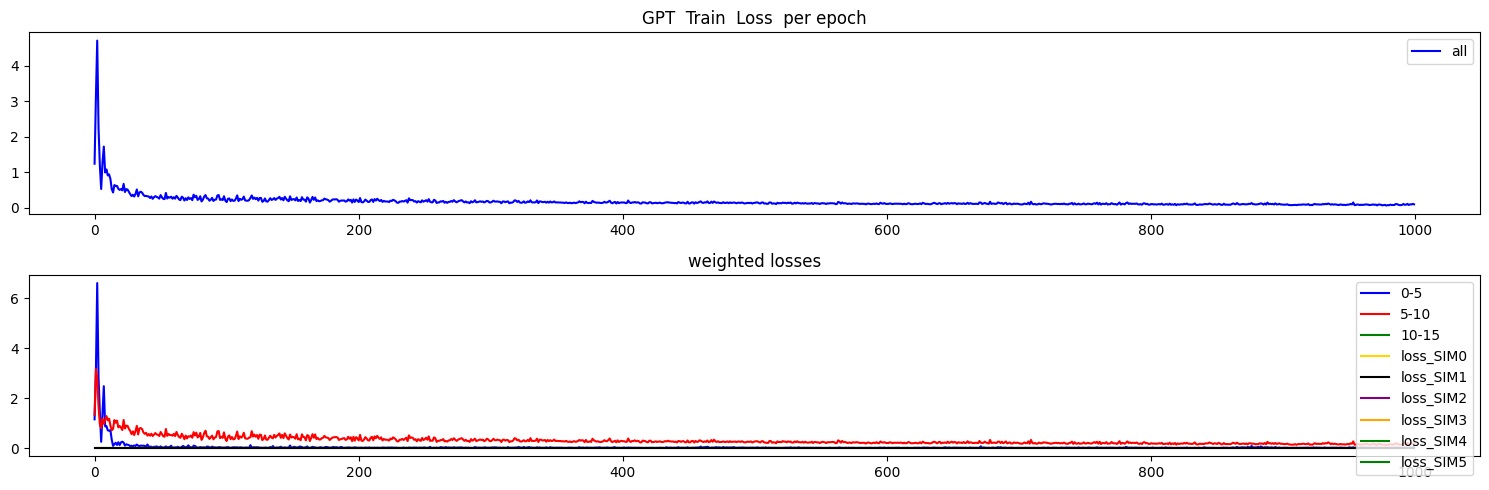

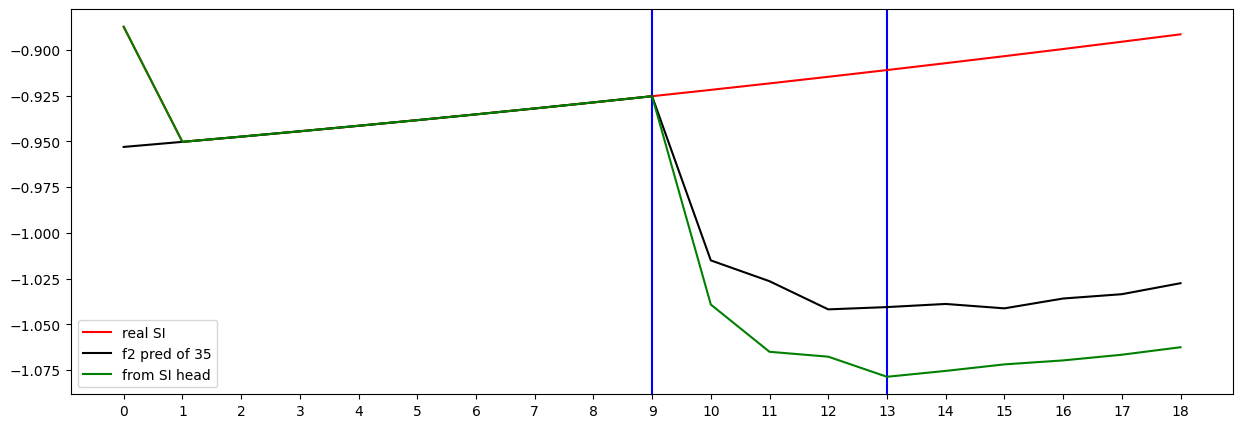

Testing R**2 - (all) - (no inputs):  0.9997687287436963
Testing R**2 - (f2) - SI full (no inputs):  -171.12232656387468
Testing R**2 - SI head only (no inputs):  -268.42964342756784
0 ...index R**2 (no inputs):  -0.9154471553235146
1 ...index R**2 (no inputs):  -11.033554872932278
2 ...index R**2 (no inputs):  -171.12232656387468
3 ...index R**2 (no inputs):  -41.978193976175554
4 ...index R**2 (no inputs):  -51.33519758150246
5 ...index R**2 (no inputs):  -241.07204874013294
6 ...index R**2 (no inputs):  -1.5596351885388668
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -183.8615835748854
9 ...index R**2 (no inputs):  -0.31087041724009734
10 ...index R**2 (no inputs):  -310.13007037551233
11 ...index R**2 (no inputs):  -48.45657475780206
12 ...index R**2 (no inputs):  -349.4976781291286
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -307.51062210910527
16 ...index R**2 (no inputs):  -6.119966595230571
17 ...index R

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 0.959704
Loss_SI: 0.8310332298278809 Loss_all: 1.0883756875991821
===
[200] Train Loss: 0.176063
Loss_SI: 0.01387874037027359 Loss_all: 0.33824777603149414
===
[400] Train Loss: 0.132522
Loss_SI: 0.011542918160557747 Loss_all: 0.2535006105899811
===
[600] Train Loss: 0.174531
Loss_SI: 0.025213439017534256 Loss_all: 0.3238481283187866
===
[800] Train Loss: 0.098894
Loss_SI: 0.00821934174746275 Loss_all: 0.1895679533481598
===


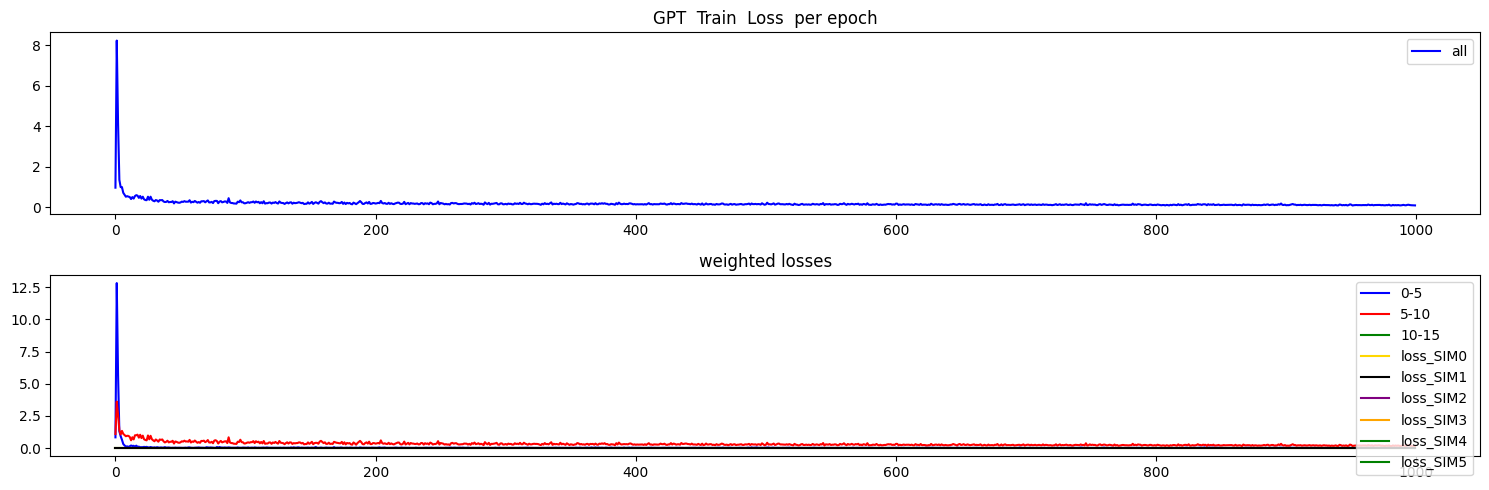

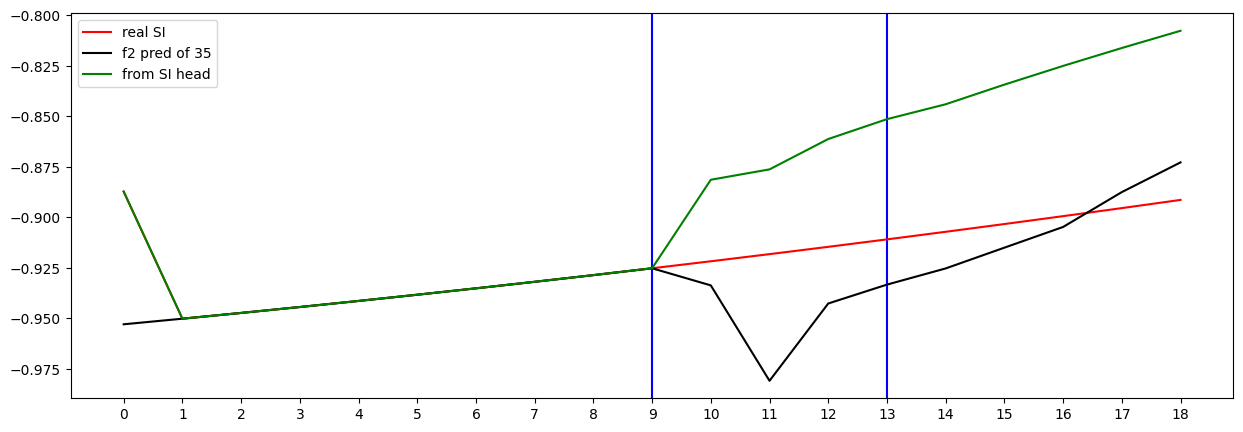

Testing R**2 - (all) - (no inputs):  0.9996445365499049
Testing R**2 - (f2) - SI full (no inputs):  -7.188101938562749
Testing R**2 - SI head only (no inputs):  -35.81103755394776
0 ...index R**2 (no inputs):  -1.060376881638439
1 ...index R**2 (no inputs):  -13.30022504531357
2 ...index R**2 (no inputs):  -7.188101938562749
3 ...index R**2 (no inputs):  -15.295536615968665
4 ...index R**2 (no inputs):  -7.569705981353971
5 ...index R**2 (no inputs):  -43.501196589887385
6 ...index R**2 (no inputs):  -0.7291458438617477
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  -3.960878871374929
9 ...index R**2 (no inputs):  -3.314520327544848
10 ...index R**2 (no inputs):  -665.6628029391468
11 ...index R**2 (no inputs):  -4.338655528918911
12 ...index R**2 (no inputs):  -16.482488161930558
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -327.683653609989
16 ...index R**2 (no inputs):  -0.9578977186087538
17 ...index R**2 (no 

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: 0.8193663013103899


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.8401139624434237


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.7957903335342869


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: 0.731051539744249



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: 0.9198752408853972
Naive_R2:....................................R²: 0.9477
RMSE:0.0856,MAE:0.0549,MASE:0.1467
1 .......................R² on just step n - R²: 0.9198752408853972
Naive_R2:....................................R²: 0.9477
RMSE:0.0856,MAE:0.0549,MASE:0.1467
2 .....................R² on first n steps - R²: 0.8974084139024385
Naive_R2:....................................R²: 0.8652
RMSE:0.0960,MAE:0.0594,MASE:0.3456
2 .......................R² on just step n - R²: 0.8741429748198764
Naive_R2:....................................R²: 0.9180
RMSE:0.1054,MAE:0.0639,MASE:0.1730
3 .....................R² on first n steps - R²: 0.8909227614524877
Naive_R2:....................................R²: 0.7836
RMSE:0.0982,MAE:0.0615,MASE:0.5475
3 .......................R² on just step n - R²: 0.8772371424017167
Naive_R2:....................................R²: 0.9201
RMSE:0.1023,MAE:0.0658,MASE:0.1802
4 .....................R² on first n steps - R

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.8690682342469308
Naive_R2:....................................R²: 0.9146
RMSE:0.1094,MAE:0.0770,MASE:0.2057
1 .......................R² on just step n - R²: 0.8690682342469308
Naive_R2:....................................R²: 0.9146
RMSE:0.1094,MAE:0.0770,MASE:0.2057
2 .....................R² on first n steps - R²: 0.8952646461278078
Naive_R2:....................................R²: 0.8624
RMSE:0.0970,MAE:0.0713,MASE:0.4145
2 .......................R² on just step n - R²: 0.9223851343512152
Naive_R2:....................................R²: 0.9494
RMSE:0.0828,MAE:0.0655,MASE:0.1773
3 .....................R² on first n steps - R²: 0.8953027108985653
Naive_R2:....................................R²: 0.7923
RMSE:0.0962,MAE:0.0728,MASE:0.6475
3 .......................R² on just step n - R²: 0.895372932009788
Naive_R2:....................................R²: 0.9319
RMSE:0.0945,MAE:0.0758,MASE:0.2077
4 .....................R² on first n steps - R²

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: 0.8532932713749777
Naive_R2:....................................R²: 0.9043
RMSE:0.1158,MAE:0.0923,MASE:0.2466
1 .......................R² on just step n - R²: 0.8532932713749777
Naive_R2:....................................R²: 0.9043
RMSE:0.1158,MAE:0.0923,MASE:0.2466
2 .....................R² on first n steps - R²: 0.8636842701647056
Naive_R2:....................................R²: 0.8209
RMSE:0.1107,MAE:0.0933,MASE:0.5423
2 .......................R² on just step n - R²: 0.8744388079090991
Naive_R2:....................................R²: 0.9182
RMSE:0.1053,MAE:0.0942,MASE:0.2548
3 .....................R² on first n steps - R²: 0.8626007120561917
Naive_R2:....................................R²: 0.7274
RMSE:0.1102,MAE:0.0943,MASE:0.8392
3 .......................R² on just step n - R²: 0.860302831655894
Naive_R2:....................................R²: 0.9090
RMSE:0.1092,MAE:0.0965,MASE:0.2645
4 .....................R² on first n steps - R²

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: 0.8792871456501306
Naive_R2:....................................R²: 0.9213
RMSE:0.1051,MAE:0.0865,MASE:0.2309
1 .......................R² on just step n - R²: 0.8792871456501306
Naive_R2:....................................R²: 0.9213
RMSE:0.1051,MAE:0.0865,MASE:0.2309
2 .....................R² on first n steps - R²: 0.8851520638338191
Naive_R2:....................................R²: 0.8491
RMSE:0.1016,MAE:0.0839,MASE:0.4881
2 .......................R² on just step n - R²: 0.8912209672396586
Naive_R2:....................................R²: 0.9291
RMSE:0.0980,MAE:0.0814,MASE:0.2203
3 .....................R² on first n steps - R²: 0.8727266212087876
Naive_R2:....................................R²: 0.7475
RMSE:0.1061,MAE:0.0876,MASE:0.7792
3 .......................R² on just step n - R²: 0.8465150624751566
Naive_R2:....................................R²: 0.9000
RMSE:0.1144,MAE:0.0949,MASE:0.2601
4 .....................R² on first n steps - R


## Plot


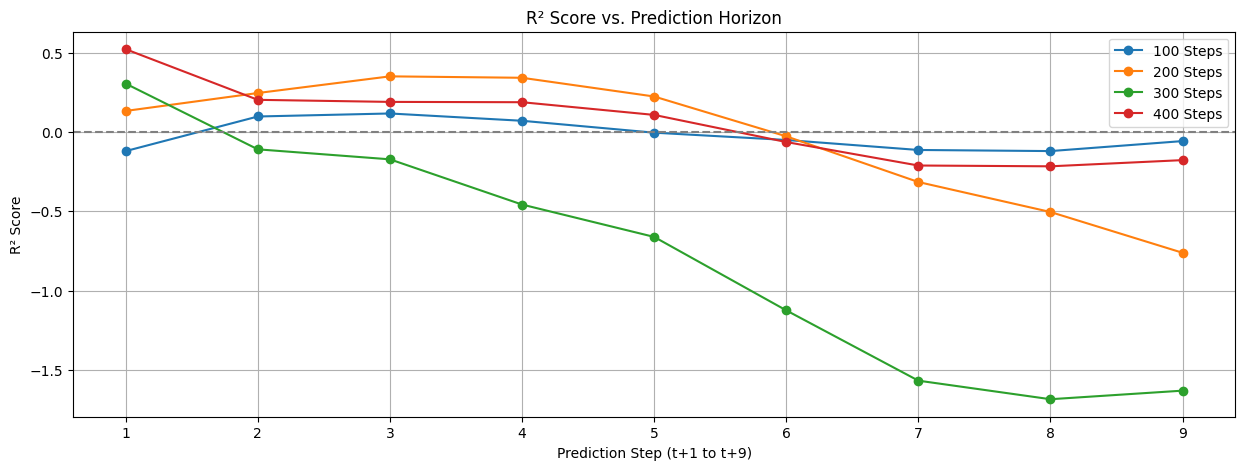

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
